New York City Taxi Trip Duration
--

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

File descriptions train.csv - the training set (contains 1458644 trip records) test.csv - the testing set (contains 625134 trip records) sample_submission.csv - a sample submission file in the correct format

Data fields

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

https://www.kaggle.com/c/nyc-taxi-trip-duration/overview


First Solution Process: Linear Regression
--

EDA
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# home
#sample_submission=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
#test=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
#train=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/Kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

# SDacademy

sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

In [2]:
df_sample_submission=pd.DataFrame(sample_submission)
df_test=pd.DataFrame(test)
df_train=pd.DataFrame(train)

In [3]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [4]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [5]:
df_sample_submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [6]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [10]:
# df_train 시간별로 라벨 생성
df_train['time_pickup']=df_train['pickup_datetime'].dt.strftime('%m%d%H%M%S')
df_train['time_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m%d%H%M%S')

df_train['month_pickup']=df_train['pickup_datetime'].dt.strftime('%m')
df_train['month_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m')

df_train['date_pickup']=df_train['pickup_datetime'].dt.strftime('%d')
df_train['date_dropoff']=df_train['dropoff_datetime'].dt.strftime('%d')

df_train['hour_pickup']=df_train['pickup_datetime'].dt.strftime('%H')
df_train['hour_dropoff']=df_train['dropoff_datetime'].dt.strftime('%H')

df_train['day_pickup']=df_train['pickup_datetime'].dt.strftime('%A')
df_train['day_dropoff']=df_train['dropoff_datetime'].dt.strftime('%A')

df_train.reset_index(drop=True, inplace=True)

In [11]:
# df_test 시간별로 라벨 생성
df_test['time_pickup']=df_test['pickup_datetime'].dt.strftime('%m%d%H%M%S')

df_test['month_pickup']=df_test['pickup_datetime'].dt.strftime('%m')

df_test['date_pickup']=df_test['pickup_datetime'].dt.strftime('%d')

df_test['hour_pickup']=df_test['pickup_datetime'].dt.strftime('%H')

df_test['day_pickup']=df_test['pickup_datetime'].dt.strftime('%A')

df_test.reset_index(drop=True, inplace=True)

In [12]:
# 만든 날짜 및 시간별 데이터 정수로 변환
df_train['time_pickup']=pd.Series(df_train['time_pickup'], dtype=int)
df_train['time_dropoff']=pd.Series(df_train['time_dropoff'], dtype=int)

df_train['month_pickup']=pd.Series(df_train['month_pickup'], dtype=int)
df_train['month_dropoff']=pd.Series(df_train['month_dropoff'], dtype=int)

df_train['date_pickup']=pd.Series(df_train['date_pickup'], dtype=int)
df_train['date_dropoff']=pd.Series(df_train['date_dropoff'], dtype=int)

df_train['hour_pickup']=pd.Series(df_train['hour_pickup'], dtype=int)
df_train['hour_dropoff']=pd.Series(df_train['hour_dropoff'], dtype=int)

df_test['time_pickup']=pd.Series(df_test['time_pickup'], dtype=int)
df_test['month_pickup']=pd.Series(df_test['month_pickup'], dtype=int)
df_test['date_pickup']=pd.Series(df_test['date_pickup'], dtype=int)
df_test['hour_pickup']=pd.Series(df_test['hour_pickup'], dtype=int)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  time_pickup         1458644 non-null  int32         
 12  time_dropoff        1458644 non-null  int32         
 13  month_pickup

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   time_pickup         625134 non-null  int32         
 10  month_pickup        625134 non-null  int32         
 11  date_pickup         625134 non-null  int32         
 12  hour_pickup         625134 non-null  int32         
 13  day_pickup          625134 no

In [15]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             625134 non-null  object
 1   trip_duration  625134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [16]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_pickup           0
time_dropoff          0
month_pickup          0
month_dropoff         0
date_pickup           0
date_dropoff          0
hour_pickup           0
hour_dropoff          0
day_pickup            0
day_dropoff           0
dtype: int64

In [17]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
time_pickup           0
month_pickup          0
date_pickup           0
hour_pickup           0
day_pickup            0
dtype: int64

In [18]:
df_sample_submission.isna().sum()

id               0
trip_duration    0
dtype: int64

날짜별, 시간대별 승객 수 보기(택시 기사 본인 제외)
--

1월부터 6월까지 달 별 탑승 승객 수

- passenger_count >= 2

In [19]:
solo=df_train[df_train.passenger_count==1].index
df_p=df_train.drop(solo)
df_p

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,130220140,130220903,1,1,30,30,22,22,Saturday,Saturday
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,...,617223459,617224040,6,6,17,17,22,22,Friday,Friday
11,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,N,...,515111611,515113459,5,5,15,15,11,11,Sunday,Sunday
12,id1187965,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2,-73.962982,40.756680,-73.984406,40.760719,N,...,219095246,219101120,2,2,19,19,9,10,Friday,Friday
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,...,510192738,510194440,5,5,10,10,19,19,Tuesday,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,...,306110448,306111745,3,3,6,6,11,11,Sunday,Sunday
1458633,id2432342,1,2016-03-17 19:10:16,2016-03-17 19:26:35,3,-73.979652,40.735279,-73.995522,40.759754,N,...,317191016,317192635,3,3,17,17,19,19,Thursday,Thursday
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,...,403135125,403140737,4,4,3,3,13,14,Sunday,Sunday
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,...,202003939,202004633,2,2,2,2,0,0,Tuesday,Tuesday


In [20]:
df_p.groupby('month_pickup')['passenger_count'].sum().reset_index()

,month_pickup,passenger_count
0,1,221990
1,2,226055
2,3,243715
3,4,242059
4,5,237695
5,6,222902


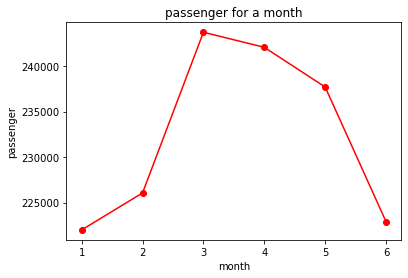

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df_p['month_pickup'].unique()
month_passenger=df_p.groupby('month_pickup')['passenger_count'].sum()
month_passenger

labels=['1','2','3','4','5','6']

fig, ax=plt.subplots()
plt.plot(labels, month_passenger, marker="o", color='r')
plt.xlabel("month")
plt.ylabel("passenger")
plt.title("passenger for a month")
plt.show()

1일 부터 31일까지 일 별 탑승 승객 수

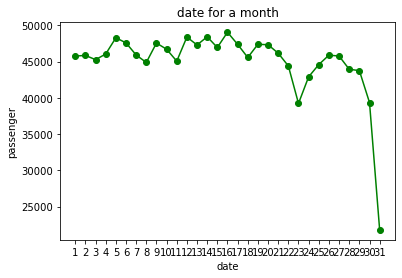

In [22]:
df_p['date_pickup'].unique()
date_passenger=df_p.groupby('date_pickup')['passenger_count'].sum()
date_passenger

labels=['1','2','3','4','5','6','7','8','9','10','11','12','13',
'14','15','16','17','18','19','20','21','22','23','24','25','26',
'27','28','29','30','31']

fig, ax=plt.subplots()
plt.plot(labels, date_passenger, marker="o", color='g')
plt.xlabel("date")
plt.ylabel("passenger")
plt.title("date for a month")
plt.show()

시간대별, 요일 별 승객 수 보기

[Text(0, 0.5, 'passenger'), Text(0.5, 1.0, 'day')]

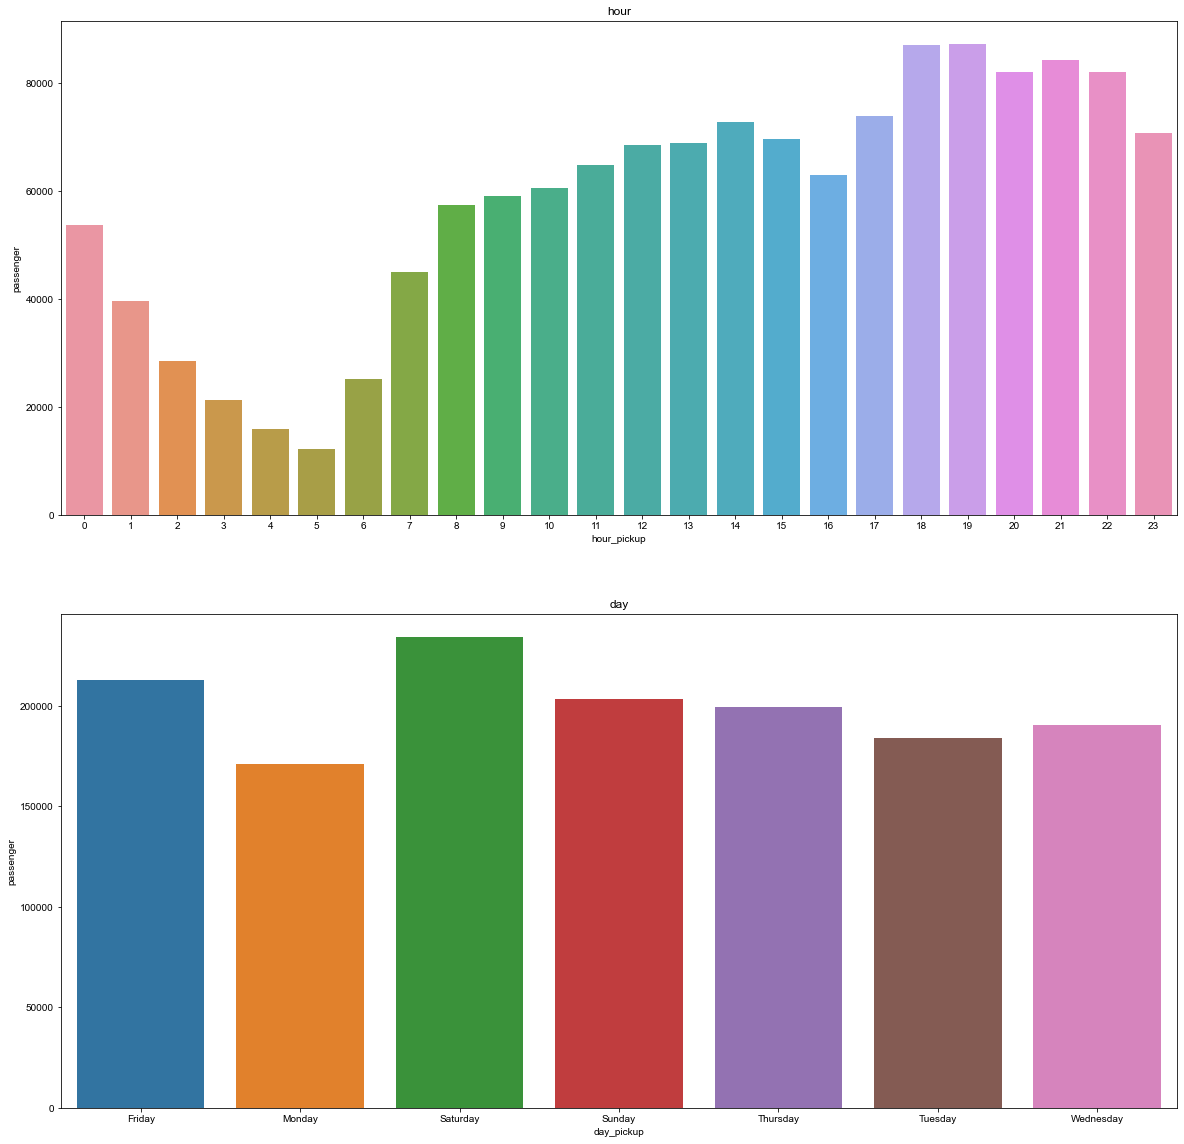

In [23]:
import seaborn as sns
hour_passenger=df_p.groupby('hour_pickup')['passenger_count'].sum().reset_index()
day_passenger=df_p.groupby('day_pickup')['passenger_count'].sum().reset_index()

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

sns.barplot(data=hour_passenger, x="hour_pickup", y="passenger_count", ax=ax1)
'\n'
sns.barplot(data=day_passenger, x="day_pickup", y="passenger_count", ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='passenger', title ="hour")
ax2.set(ylabel='passenger', title ="day")

- make elapsed_time column

In [24]:
i=0
elapsed_time=[]

for i in range(0,1458644):
    e_time=df_train.dropoff_datetime[i]-df_train.pickup_datetime[i]
    elapsed_time.append(e_time)
    i+=1

In [25]:
elapsed_time=pd.Series(elapsed_time)
df_train['elapsed_time']=elapsed_time
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,314173230,3,3,14,14,17,17,Monday,Monday,0 days 00:07:35
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,612005438,6,6,12,12,0,0,Sunday,Sunday,0 days 00:11:03
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,119121048,1,1,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,406193940,4,4,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,326133810,3,3,26,26,13,13,Saturday,Saturday,0 days 00:07:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,408134402,4,4,8,8,13,13,Friday,Friday,0 days 00:12:58
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,110074610,1,1,10,10,7,7,Sunday,Sunday,0 days 00:10:55
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,422071025,4,4,22,22,6,7,Friday,Friday,0 days 00:12:44
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,105160239,1,1,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13


- make elapsed_time_h column
- elpased_time_h == trip_duration * 3600

In [26]:
i=0
elapsed_time_h=[]

for i in range(0,1458644):
    e_time_h=round((df_train.elapsed_time.iloc[i].seconds/3600), 5)
    elapsed_time_h.append(e_time_h)

In [66]:
elapsed_time_h=pd.Series(elapsed_time_h)
df_train['elapsed_time_h']=elapsed_time_h

- make distance column

In [27]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def get_harvevrsion_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon=GeoUtil.degree2radius(x2-x1)
        dLat=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat/2)*math.sin(dLat/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon/2)*math.sin(dLon/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R*b, round_decimal_digits)

In [28]:
df_train['distance']=df_train.id
df_test['distance']=df_test.id

In [29]:
i=0
d=[]

for i in range(0,1458644):
    x1=df_train.iloc[i, 5]
    y1=df_train.iloc[i, 6]
    x2=df_train.iloc[i, 7]
    y2=df_train.iloc[i, 8]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [30]:
d=pd.Series(d)
df_train['distance']=d

In [31]:
i=0
d=[]

for i in range(0,625134):
    x1=df_test.iloc[i, 4]
    y1=df_test.iloc[i, 5]
    x2=df_test.iloc[i, 6]
    y2=df_test.iloc[i, 7]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [32]:
d=pd.Series(d)
df_test['distance']=d

- store_and_fwd_flag encoding

In [33]:
i=0
store_and_fwd_flag=[]

for i in range(0,1458644):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1

In [34]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_train['store_and_fwd_flag']=store_and_fwd_flag

In [35]:
i=0
store_and_fwd_flag=[]

for i in range(0,625134):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1

In [36]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_test['store_and_fwd_flag']=store_and_fwd_flag

store_and_fwd_flag ratio
--

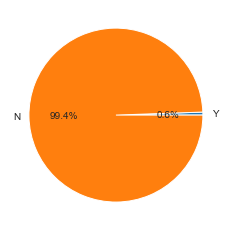

In [37]:
Y=len(df_train[df_train.store_and_fwd_flag==1].value_counts())
N=len(df_train[df_train.store_and_fwd_flag==0].value_counts())
store_and_fwd_flag=len(df_train.store_and_fwd_flag)

store_and_fwd_flag_ratio=[Y, N]
labels=['Y','N']

plt.pie(store_and_fwd_flag_ratio, labels=labels, autopct='%.1f%%')
plt.show()

- This flag indicates whether the trip record was held in vehicle memory before

- sending to the vendor because the vehicle did not have a connection to the server

- Y=store and forward; N=not a store and forward trip

- store and forward 방식: 패킷교환에서 채택한 축적 교환(Store-and-Forward) 방식은 일단 들어오는 데이터를 버퍼에 담아두고(Store) CRC 등 에러검출과 같은 처리를 완전히 한 이후에 전달(Forward)하는 교환 기법이다.

vendor_id
--

- a code indicating the provider associated with the trip record

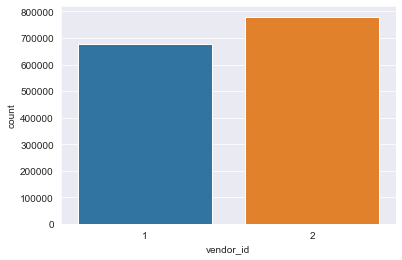

In [38]:
sns.countplot(df_train.vendor_id)
plt.show()

passenger_count
--

- passenger_count - the number of passengers in the vehicle (driver entered value)

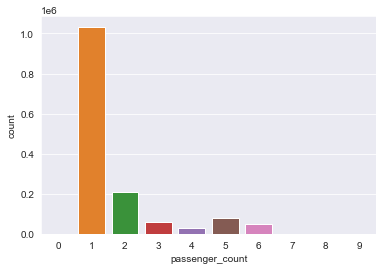

In [39]:
sns.countplot(df_train.passenger_count)
plt.show()

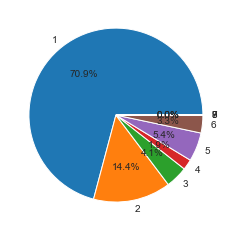

In [40]:
p1=len(df_train[df_train.passenger_count==1].value_counts())
p2=len(df_train[df_train.passenger_count==2].value_counts())
p3=len(df_train[df_train.passenger_count==3].value_counts())
p4=len(df_train[df_train.passenger_count==4].value_counts())
p5=len(df_train[df_train.passenger_count==5].value_counts())
p6=len(df_train[df_train.passenger_count==6].value_counts())
p7=len(df_train[df_train.passenger_count==7].value_counts())
p8=len(df_train[df_train.passenger_count==8].value_counts())
p9=len(df_train[df_train.passenger_count==9].value_counts())

pc=len(df_train.passenger_count)

passenger_count_ratio=[p1, p2, p3, p4, p5, p6, p7, p8, p9]
labels=['1','2','3','4','5','6','7','8','9']

plt.pie(passenger_count_ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [41]:
def bar_chart2(feature):
    no_passenger = df_train[df_train['passenger_count'] ==1][feature].value_counts() 
    passenger= df_train[df_train['passenger_count'] !=1][feature].value_counts() 
    df = pd.DataFrame([no_passenger,passenger]) 
    df.index = ['NO','YES'] 
    df.plot(kind = 'bar',stacked = True, figsize = (10,5))

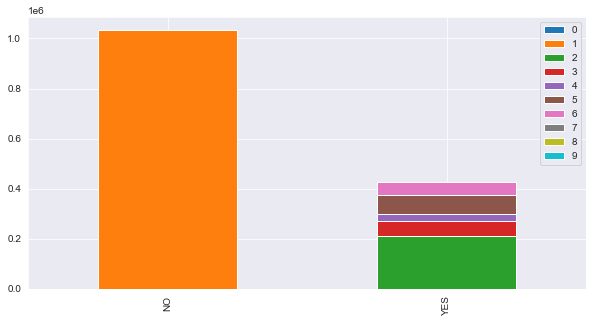

In [42]:
bar_chart2('passenger_count')

위도와 경도 분석하기
--

1. train

- pickup

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

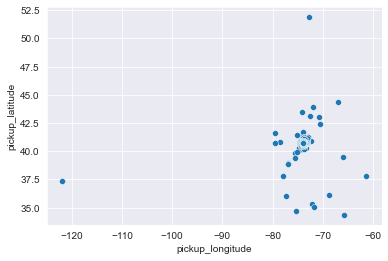

In [43]:
pickup=df_train.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

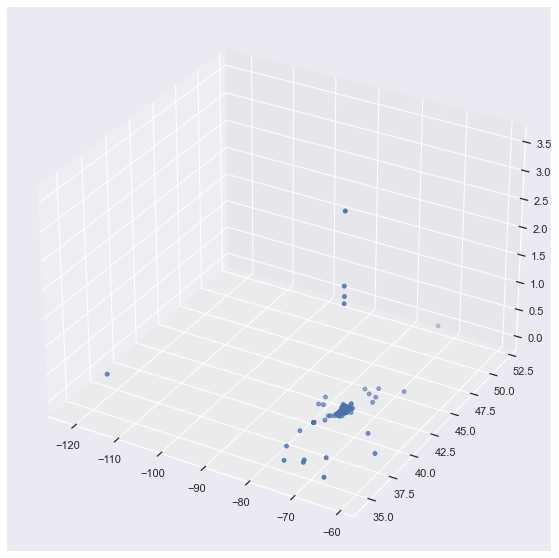

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

p_longitude=np.array(df_train.pickup_longitude)
p_latitude=np.array(df_train.pickup_latitude)
time=np.array(df_train.trip_duration)

xs=p_longitude
ys=p_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

- x: pickup_longitude
- y: pickup_latitude
- z: trip_duration

- dropoff

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

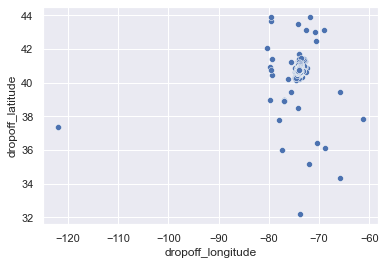

In [45]:
dropoff=df_train.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

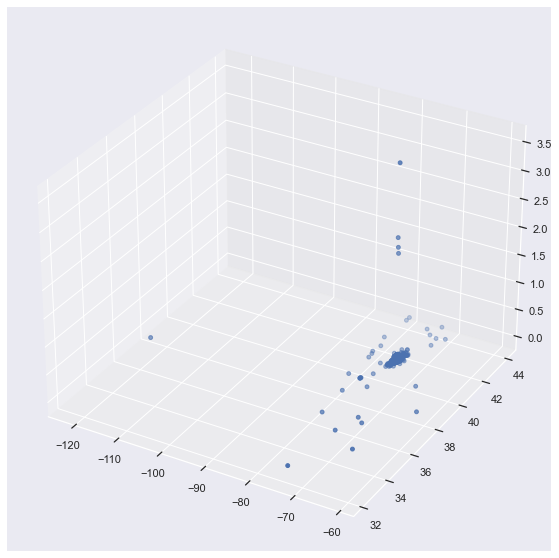

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

d_longitude=np.array(df_train.dropoff_longitude)
d_latitude=np.array(df_train.dropoff_latitude)
time=np.array(df_train.trip_duration)

xs=d_longitude
ys=d_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

1. test

- pickup

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

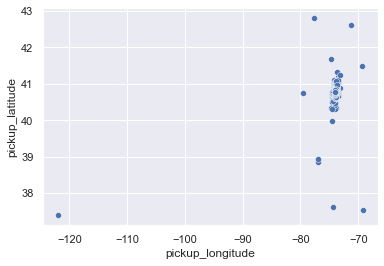

In [47]:
pickup=df_test.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

- dropoff

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

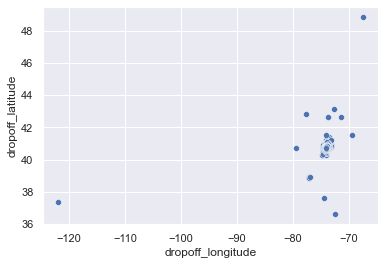

In [48]:
dropoff=df_test.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

Folium으로 지도 보기

1. train

In [49]:
pickup=df_train[['pickup_latitude','pickup_longitude']]
dropoff=df_train[['dropoff_latitude','dropoff_longitude']]

In [50]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [51]:
df_train.pickup_latitude.mean()

40.750920908391734

In [52]:
df_train.pickup_longitude.mean()

-73.97348630489282

In [53]:
len(pickup_list)

1458644

In [54]:
!pip install folium

In [55]:
import folium

lon, lat= -73.97348630489282, 40.750920908391734
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(1458644, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

1. test

In [56]:
pickup=df_test[['pickup_latitude','pickup_longitude']]
dropoff=df_test[['dropoff_latitude','dropoff_longitude']]

In [57]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [58]:
df_test.pickup_latitude.mean()

40.75092741194779

In [59]:
df_test.pickup_longitude.mean()

-73.97361432244571

In [60]:
len(pickup_list)

625134

In [61]:
import folium

lon, lat= -73.97361432244571, 40.75092741194779
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(625134, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

속도를 측정하여 칼럼 만들기
--

In [67]:
train_1=df_train.drop(['month_pickup','month_dropoff','date_pickup','date_dropoff','hour_pickup','hour_dropoff'], axis=1)
train_1

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,day_pickup,day_dropoff,elapsed_time,distance,elapsed_time_h
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,Monday,Monday,0 days 00:07:35,1.49852,0.12639
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,Sunday,Sunday,0 days 00:11:03,1.80551,0.18417
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,119121048,Tuesday,Tuesday,0 days 00:35:24,6.38510,0.59000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,Wednesday,Wednesday,0 days 00:07:09,1.48550,0.11917
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,Saturday,Saturday,0 days 00:07:15,1.18859,0.12083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,Friday,Friday,0 days 00:12:58,1.22508,0.21611
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,Sunday,Sunday,0 days 00:10:55,6.04984,0.18194
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,Friday,Friday,0 days 00:12:44,7.82461,0.21222
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,Tuesday,Tuesday,0 days 00:06:13,1.09256,0.10361


In [68]:
# 이상치 제거
# IQR
def remove_outlier_test(d_cp, column):
    fraud_column_data=d_cp[column]
    quan_25=np.percentile(fraud_column_data.values, 25)
    quan_75=np.percentile(fraud_column_data.values, 75)

    iqr=quan_75-quan_25
    iqr=iqr*1.5
    lowest=quan_25-iqr
    highest=quan_75+iqr
    outlier_index=fraud_column_data[(fraud_column_data<lowest)|(fraud_column_data>highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [69]:
train_1=remove_outlier_test(train_1, 'elapsed_time_h' )
train_1=remove_outlier_test(train_1, 'distance' )

74324
(1384320, 18)
107658
(1276662, 18)


In [70]:
np_elap=np.array([train_1.elapsed_time_h])
np_dis=np.array([train_1.distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
train_1['km_h']=np_speed

In [71]:
train_1=remove_outlier_test(train_1, 'km_h' )

39908
(1236754, 19)


속도 밀도 보기
--

<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

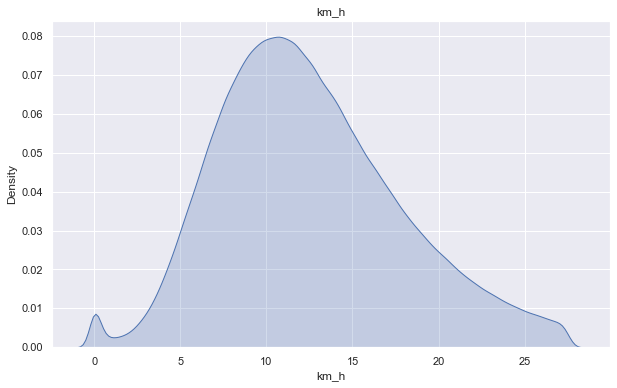

In [72]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=train_1['km_h'], shade=True)

In [73]:
print('km/h의 평균은', round(train_1.km_h.mean(), 2), 'km/h 입니다.')

km/h의 평균은 12.49 km/h 입니다.


- 실제로 Madision Ave 거리의 시작점과 끝점을 구글맵을 이용해 km/h를 계산하면,

- 9.02km를 가는 데, 17분 정도가 소요된다. 이를 km/h로 환산하면 평균 31.83km/h가 나온다. ( 이 외에도 두 곳정도를 더 실험해본 결과 평균 30km/h대에서 계산되었음. )

- 이를 통해서 IQR 제거 이후 km/h의 분포가 낮은 km/h에서 형성된 것같다는 의심을 하였다.

- km/h가 낮게 나오는 이유를 예측해보면, 분자인 km가 너무 낮게 형성되어 있거나, h가 너무 높게 잡혀있을 것이라는 판단을 하였다.

- trip_duraion을 맞추는 문제에서 trip_duration에 전반적인 문제가 있을 확률보다는 km가 너무 낮게 형성되어있을 확률이 높을 거라는 추측하에 그 이유를 분석하여 예측거리 가설을 세웠다.

--- 예측거리 가설은 PPT를 참고 ---
--

예측거리 칼럼 만들어 주기
--


In [74]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def prediction_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon_1=GeoUtil.degree2radius(x2-x1)
        dLat_1=GeoUtil.degree2radius(y1-y1)
        
        a=math.sin(dLat_1/2)*math.sin(dLat_1/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y1))\
           *math.sin(dLon_1/2)*math.sin(dLon_1/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        
        a1=round(R*b, round_decimal_digits)
        
        R=6371 # 지구의 반경(단위: km)
        dLon_2=GeoUtil.degree2radius(x2-x2)
        dLat_2=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat_2/2)*math.sin(dLat_2/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon_2/2)*math.sin(dLon_2/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        
        
        b1=round(R*b, round_decimal_digits)
        
        pred_dis=a1+b1
        
        return round(pred_dis, round_decimal_digits)

In [75]:
i=0
d=[]

for i in range(0,1458644):
    x1=df_train.iloc[i, 5]
    y1=df_train.iloc[i, 6]
    x2=df_train.iloc[i, 7]
    y2=df_train.iloc[i, 8]
    
    dis=GeoUtil.prediction_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [76]:
d=pd.Series(d)
df_train['pred_distance']=d
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,distance,elapsed_time_h,pred_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,14,14,17,17,Monday,Monday,0 days 00:07:35,1.49852,0.12639,1.73544
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,12,12,0,0,Sunday,Sunday,0 days 00:11:03,1.80551,0.18417,2.43050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24,6.38510,0.59000,8.20358
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09,1.48550,0.11917,1.66133
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,26,26,13,13,Saturday,Saturday,0 days 00:07:15,1.18859,0.12083,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,8,8,13,13,Friday,Friday,0 days 00:12:58,1.22508,0.21611,1.66590
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,10,10,7,7,Sunday,Sunday,0 days 00:10:55,6.04984,0.18194,8.05858
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,22,22,6,7,Friday,Friday,0 days 00:12:44,7.82461,0.21222,10.64565
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13,1.09256,0.10361,1.52185


<AxesSubplot:title={'center':'pred_distance'}, xlabel='pred_distance', ylabel='Density'>

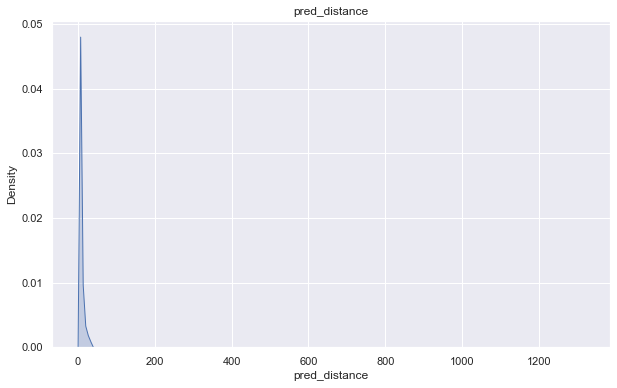

In [77]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pred_distance")
sns.kdeplot(data=df_train['pred_distance'], shade=True)

In [78]:
i=0
d=[]

for i in range(0,625134):
    x1=df_test.iloc[i, 4]
    y1=df_test.iloc[i, 5]
    x2=df_test.iloc[i, 6]
    y2=df_test.iloc[i, 7]
    
    dis=GeoUtil.prediction_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [79]:
d=pd.Series(d)
df_test['pred_distance']=d

In [80]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,distance,pred_distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,Thursday,2.74643,2.91330
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,Thursday,2.75924,3.10480
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,Thursday,1.30616,1.84634
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,Thursday,5.26909,7.16334
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,Thursday,0.96084,1.35416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,Friday,0.96744,1.13575
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,Friday,6.19634,8.76282
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,Friday,8.15372,9.30275
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,Friday,20.38075,27.89350


<AxesSubplot:title={'center':'pred_distance'}, xlabel='pred_distance', ylabel='Density'>

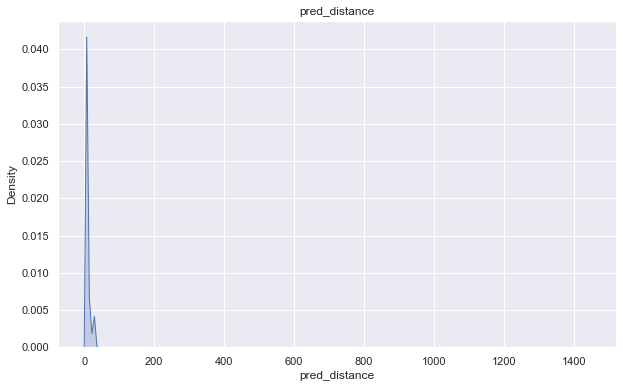

In [81]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pred_distance")
sns.kdeplot(data=df_test['pred_distance'], shade=True)

예측거리를 이용하여 속도를 측정하여 칼럼 만들기
--

In [82]:
train_2=df_train.drop(['month_pickup','month_dropoff','date_pickup','date_dropoff','hour_pickup','hour_dropoff'], axis=1)
train_2

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,day_pickup,day_dropoff,elapsed_time,distance,elapsed_time_h,pred_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,Monday,Monday,0 days 00:07:35,1.49852,0.12639,1.73544
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,Sunday,Sunday,0 days 00:11:03,1.80551,0.18417,2.43050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,119121048,Tuesday,Tuesday,0 days 00:35:24,6.38510,0.59000,8.20358
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,Wednesday,Wednesday,0 days 00:07:09,1.48550,0.11917,1.66133
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,Saturday,Saturday,0 days 00:07:15,1.18859,0.12083,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,Friday,Friday,0 days 00:12:58,1.22508,0.21611,1.66590
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,Sunday,Sunday,0 days 00:10:55,6.04984,0.18194,8.05858
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,Friday,Friday,0 days 00:12:44,7.82461,0.21222,10.64565
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,Tuesday,Tuesday,0 days 00:06:13,1.09256,0.10361,1.52185


In [83]:
train_2=remove_outlier_test(train_2, 'elapsed_time_h' )
train_2=remove_outlier_test(train_2, 'pred_distance' )

74324
(1384320, 19)
105861
(1278459, 19)


In [84]:
np_elap=np.array([train_2.elapsed_time_h])
np_dis=np.array([train_2.pred_distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
train_2['km_h']=np_speed

In [85]:
train_2=remove_outlier_test(train_2, 'km_h' )

42147
(1236312, 20)


속도 밀도 비교하여 보기
--

<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

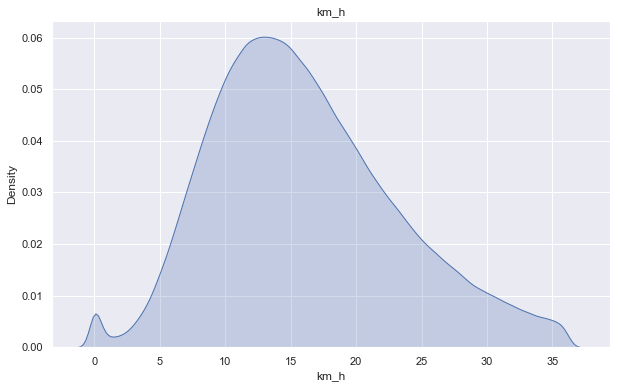

In [86]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=train_2['km_h'], shade=True)

In [87]:
print('harverdine km/h의 평균은', round(train_1.km_h.mean(), 2), 'km/h 입니다.')
print('prediction distance km/h의 평균은', round(train_2.km_h.mean(), 2), 'km/h 입니다.')

harverdine km/h의 평균은 12.49 km/h 입니다.
prediction distance km/h의 평균은 16.05 km/h 입니다.


Machine learning
--

(First Solution Process: Linear Regression)
--

1.train data를 Linear Regression에 맞게 전처리 해준다.

2.train data를 train, test로 나눠서 적용해본다.

3.실제 train데이터를 train, test데이터를 test로 나눈다.

4.test데이터의 예측값을 sample_submissiondml trip_duration에 적용해준다.

In [88]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'time_pickup', 'time_dropoff', 'month_pickup',
       'month_dropoff', 'date_pickup', 'date_dropoff', 'hour_pickup',
       'hour_dropoff', 'day_pickup', 'day_dropoff', 'elapsed_time', 'distance',
       'elapsed_time_h', 'pred_distance'],
      dtype='object')

In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   id                  1458644 non-null  object         
 1   vendor_id           1458644 non-null  int64          
 2   pickup_datetime     1458644 non-null  datetime64[ns] 
 3   dropoff_datetime    1458644 non-null  datetime64[ns] 
 4   passenger_count     1458644 non-null  int64          
 5   pickup_longitude    1458644 non-null  float64        
 6   pickup_latitude     1458644 non-null  float64        
 7   dropoff_longitude   1458644 non-null  float64        
 8   dropoff_latitude    1458644 non-null  float64        
 9   store_and_fwd_flag  1458644 non-null  int64          
 10  trip_duration       1458644 non-null  int64          
 11  time_pickup         1458644 non-null  int32          
 12  time_dropoff        1458644 non-null  int32          
 1

In [90]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'time_pickup', 'time_dropoff', 'month_pickup',
       'month_dropoff', 'date_pickup', 'date_dropoff', 'hour_pickup',
       'hour_dropoff', 'day_pickup', 'day_dropoff', 'elapsed_time', 'distance',
       'elapsed_time_h', 'pred_distance'],
      dtype='object')

In [151]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,distance,elapsed_time_h,pred_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,14,14,17,17,Monday,Monday,0 days 00:07:35,1.49852,0.12639,1.73544
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,12,12,0,0,Sunday,Sunday,0 days 00:11:03,1.80551,0.18417,2.43050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24,6.38510,0.59000,8.20358
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09,1.48550,0.11917,1.66133
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,26,26,13,13,Saturday,Saturday,0 days 00:07:15,1.18859,0.12083,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,8,8,13,13,Friday,Friday,0 days 00:12:58,1.22508,0.21611,1.66590
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,10,10,7,7,Sunday,Sunday,0 days 00:10:55,6.04984,0.18194,8.05858
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,22,22,6,7,Friday,Friday,0 days 00:12:44,7.82461,0.21222,10.64565
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13,1.09256,0.10361,1.52185


In [576]:
# harversine distance 적용 train
lr_train_1=df_train.drop(['dropoff_datetime','elapsed_time','day_dropoff','pickup_datetime',
                      'month_dropoff','date_dropoff','hour_dropoff','pred_distance'], axis=1)

lr_train_1

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,date_pickup,hour_pickup,day_pickup,distance,elapsed_time_h
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,3,14,17,Monday,1.49852,0.12639
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,6,12,0,Sunday,1.80551,0.18417
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,119121048,1,19,11,Tuesday,6.38510,0.59000
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,4,6,19,Wednesday,1.48550,0.11917
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,3,26,13,Saturday,1.18859,0.12083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,4,8,13,Friday,1.22508,0.21611
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,1,10,7,Sunday,6.04984,0.18194
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,4,22,6,Friday,7.82461,0.21222
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1,5,15,Tuesday,1.09256,0.10361


In [577]:
# harversine distance 를 적용 test
lr_test_1=df_test.drop(['pickup_datetime','pred_distance'], axis=1)

id label encoding

In [578]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_train_encoded_id=le.fit_transform(lr_train_1['id'])
np_id=lr_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_train_1['id']=id_1

In [579]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_test_encoded_id=le.fit_transform(lr_test_1['id'])
np_id=lr_test_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

lr_test_1['id']=id_1

day label encoding

In [580]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_train_encoded_day=le.fit_transform(lr_train_1['day_pickup'])
np_day=lr_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day_1=pd.Series(day_1)

lr_train_1['day_pickup']=day_1

In [582]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

lr_test_encoded_day=le.fit_transform(lr_test_1['day_pickup'])
np_day=lr_test_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day_1=pd.Series(day_1)

lr_test_1['day_pickup']=day_1

In [583]:
lr_train_1=remove_outlier_test(lr_train_1, 'elapsed_time_h' )

lr_train_1=remove_outlier_test(lr_train_1, 'distance' )

74324
(1384320, 17)
107658
(1276662, 17)


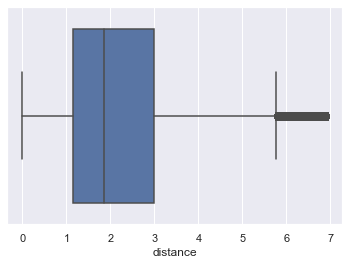

In [584]:
sns.boxplot(x = "distance", orient = "v", data = lr_train_1)
sns.set_style("darkgrid")
plt.show()

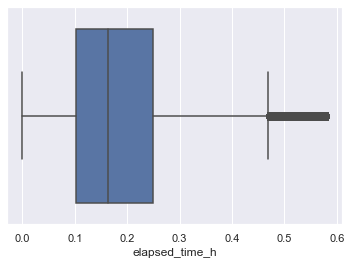

In [585]:
sns.boxplot(x = "elapsed_time_h", orient = "v", data = lr_train_1)
sns.set_style("darkgrid")
plt.show()

평균 속도 칼럼 만들어 주기

In [586]:
np_elap=np.array([lr_train_1.elapsed_time_h])
np_dis=np.array([lr_train_1.distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
lr_train_1['km_h']=np_speed
lr_train_1

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,date_pickup,hour_pickup,day_pickup,distance,elapsed_time_h,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,3,14,17,1,1.49852,0.12639,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,6,12,0,3,1.80551,0.18417,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,4,6,19,6,1.48550,0.11917,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,3,26,13,2,1.18859,0.12083,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,1,30,22,2,1.09894,0.12306,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,2,2,0,5,2.31745,0.11500,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,4,8,13,0,1.22508,0.21611,5.668780
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,1,10,7,3,6.04984,0.18194,33.251841
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1,5,15,5,1.09256,0.10361,10.544928


In [587]:
lr_train_1=remove_outlier_test(lr_train_1, 'km_h' )

39908
(1236754, 18)


모든 변수를 포함한 Linear Regression Model 만들기
--

train 데이터를 train, test로 나누어서 학습시켜보기
--

1. harversine distance 모델 적용

In [588]:
X=lr_train_1.drop(['trip_duration','time_dropoff','elapsed_time_h','km_h'], axis=1)

In [589]:
y=lr_train_1.trip_duration

In [590]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(989403, 14)
(247351, 14)
(989403,)
(247351,)


In [591]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [592]:
y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 279.4136444164348 입니다.
r2 는 0.51 입니다.
train 스코어는 0.507486579181908 입니다.


In [593]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 279.71989278644116 입니다.
r2 점수는 0.51 입니다.
test 스코어는 0.5061720924928631 입니다.


In [594]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 9.094e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        15:05:37   Log-Likelihood:            -8.7214e+06
No. Observations:             1236754   AIC:                         1.744e+07
Df Residuals:                 1236739   BIC:                         1.744e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.21e+04    557.740     21.703      0.000     1.1e+04    1.32e+04
id                  1.067e-06   5.97e-07      1.788      0.074   -1.03e-07    2.24e-06
vendor_id              0.3239      0.528      0.614      0.539      -0.710       1.358
passenger_count        2.0875      0.200     10.431      0.000       1.695       2.480
pickup_longitude     440.4550     16.156     27.263      0.000     408.790     472.120
pickup_latitude      471.9718     15.961     29.570      0.000     440.689     503.255
dropoff_longitude   -513.5799     16.029    -32.040      0.000    -544.996    -482.163
dropoff_latitude    -898.0200     14.811    -60.633      0.000    -927.049    -868.991
store_and_fwd_flag    16.4435      3.649      4.506      0.000       9.291      23.596
time_pickup           -0.0007      0.000     -4.709      0.000      -0.001      -0.000
month_pickup        6.834e+04   1.45e+04      4.709      0.000    3.99e+04    9.68e+04
date_pickup          683.5609    145.128      4.710      0.000     399.115     968.007
hour_pickup            9.3823      1.452      6.464      0.000       6.537      12.227
day_pickup             7.9095      0.125     63.412      0.000       7.665       8.154
distance             193.3088      0.175   1102.609      0.000     192.965     193.652
==============================================================================
Omnibus:                   281635.272   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           674460.275
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                       5.570   Cond. No.                     2.33e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

실제 train 데이터와 test 데이터에 적용해보기
--

1. harversine distance model

In [595]:
X_train=lr_train_1.drop(['trip_duration','time_dropoff','elapsed_time_h','km_h'], axis=1)

In [596]:
y_train=lr_train_1.trip_duration

In [597]:
X_test=lr_test_1

In [598]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [599]:
y_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 279.46286949180535 입니다.
r2 는 0.51 입니다.
train 스코어는 0.5072668137408712 입니다.


In [600]:
pred=reg_all.predict(X_test)

In [601]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [602]:
submission

,id,trip_duration
0,id3004672,843.101415
1,id3505355,906.996585
2,id1217141,585.242180
3,id2150126,1385.498761
4,id1598245,505.489479
...,...,...
625129,id3008929,372.970918
625130,id3700764,1323.068173
625131,id2568735,1716.882148
625132,id1384355,3923.974908


- 실제 점수 0.55945 (낮을 수록 좋은 점수)

In [604]:
#submission.to_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/submission(hd2).csv', index=False)

2. prediction distance model

똑같이 돌려본 결과 harversine model의 점수가 더 높은 것을 확인할 수 있었음.

- harversine distance 모델이 점수가 더 높음

- 따라서, ipynb 가독성을 위해 prediction distance 모델 계산과정을 삭제하였음.

In [244]:
#submission.to_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/submission(pd1).csv', index=False)

harversine distance 모델 결과 자세히 보기

In [605]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X_train)

model_1=sm.OLS(y_train,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 9.094e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        15:13:50   Log-Likelihood:            -8.7214e+06
No. Observations:             1236754   AIC:                         1.744e+07
Df Residuals:                 1236739   BIC:                         1.744e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.21e+04    557.740     21.703      0.000     1.1e+04    1.32e+04
id                  1.067e-06   5.97e-07      1.788      0.074   -1.03e-07    2.24e-06
vendor_id              0.3239      0.528      0.614      0.539      -0.710       1.358
passenger_count        2.0875      0.200     10.431      0.000       1.695       2.480
pickup_longitude     440.4550     16.156     27.263      0.000     408.790     472.120
pickup_latitude      471.9718     15.961     29.570      0.000     440.689     503.255
dropoff_longitude   -513.5799     16.029    -32.040      0.000    -544.996    -482.163
dropoff_latitude    -898.0200     14.811    -60.633      0.000    -927.049    -868.991
store_and_fwd_flag    16.4435      3.649      4.506      0.000       9.291      23.596
time_pickup           -0.0007      0.000     -4.709      0.000      -0.001      -0.000
month_pickup        6.834e+04   1.45e+04      4.709      0.000    3.99e+04    9.68e+04
date_pickup          683.5609    145.128      4.710      0.000     399.115     968.007
hour_pickup            9.3823      1.452      6.464      0.000       6.537      12.227
day_pickup             7.9095      0.125     63.412      0.000       7.665       8.154
distance             193.3088      0.175   1102.609      0.000     192.965     193.652
==============================================================================
Omnibus:                   281635.272   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           674460.275
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                       5.570   Cond. No.                     2.33e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [606]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X_train.columns )
coeff.sort_values(ascending=False)

month_pickup          68343.9
date_pickup             683.6
pickup_latitude         472.0
pickup_longitude        440.5
distance                193.3
store_and_fwd_flag       16.4
hour_pickup               9.4
day_pickup                7.9
passenger_count           2.1
vendor_id                 0.3
time_pickup              -0.0
id                        0.0
dropoff_longitude      -513.6
dropoff_latitude       -898.0
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

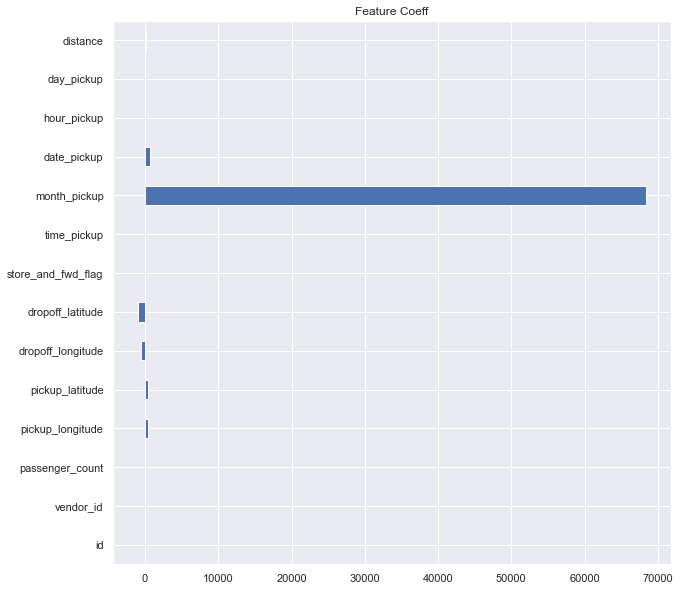

In [607]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [608]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_train)
mse=mean_squared_error(y_train, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.507
lr mse: 78099.495
lr rmse: 279.463


ridge train score: 0.507
ridge mse: 78100.898
ridge rmse: 279.465


lasso train score: 0.504
lasso mse: 78659.628
lasso rmse: 280.463


elasticnet train score: 0.485
elasticnet mse: 81577.779
elasticnet rmse: 285.618


<AxesSubplot:title={'center':'trip_duration'}, xlabel='trip_duration', ylabel='Density'>

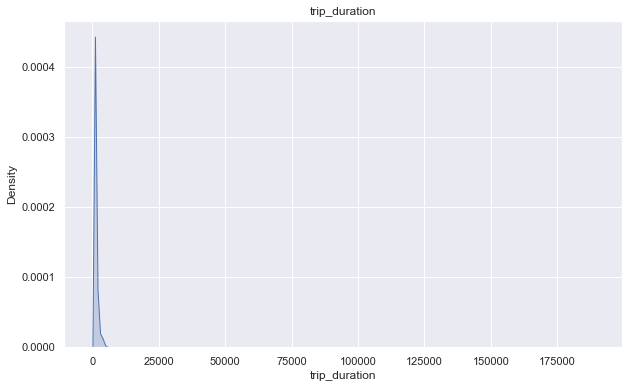

In [609]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("trip_duration")
sns.kdeplot(data=submission['trip_duration'], shade=True)

Second Solution Process: Classification
--

EDA
--

In [258]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,distance,elapsed_time_h,pred_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,14,14,17,17,Monday,Monday,0 days 00:07:35,1.49852,0.12639,1.73544
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,12,12,0,0,Sunday,Sunday,0 days 00:11:03,1.80551,0.18417,2.43050
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24,6.38510,0.59000,8.20358
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09,1.48550,0.11917,1.66133
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,26,26,13,13,Saturday,Saturday,0 days 00:07:15,1.18859,0.12083,1.19946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,8,8,13,13,Friday,Friday,0 days 00:12:58,1.22508,0.21611,1.66590
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,10,10,7,7,Sunday,Sunday,0 days 00:10:55,6.04984,0.18194,8.05858
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,22,22,6,7,Friday,Friday,0 days 00:12:44,7.82461,0.21222,10.64565
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13,1.09256,0.10361,1.52185


In [259]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,distance,pred_distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,Thursday,2.74643,2.91330
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,Thursday,2.75924,3.10480
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,Thursday,1.30616,1.84634
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,Thursday,5.26909,7.16334
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,Thursday,0.96084,1.35416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,Friday,0.96744,1.13575
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,Friday,6.19634,8.76282
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,Friday,8.15372,9.30275
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,Friday,20.38075,27.89350


In [545]:
cl_train=df_train.drop(['dropoff_datetime','elapsed_time','day_dropoff','pickup_datetime',
                      'month_dropoff','date_dropoff','hour_dropoff','pred_distance'], axis=1)

cl_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,date_pickup,hour_pickup,day_pickup,distance,elapsed_time_h
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,3,14,17,Monday,1.49852,0.12639
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,6,12,0,Sunday,1.80551,0.18417
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,119113524,119121048,1,19,11,Tuesday,6.38510,0.59000
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,4,6,19,Wednesday,1.48550,0.11917
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,3,26,13,Saturday,1.18859,0.12083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,4,8,13,Friday,1.22508,0.21611
1458640,id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,1,10,7,Sunday,6.04984,0.18194
1458641,id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,4,22,6,Friday,7.82461,0.21222
1458642,id2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1,5,15,Tuesday,1.09256,0.10361


In [546]:
cl_test=df_test.drop(['pred_distance','pickup_datetime'], axis=1)

cl_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,distance
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,1,630235958,6,30,23,Thursday,2.74643
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,1,630235953,6,30,23,Thursday,2.75924
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,1,630235947,6,30,23,Thursday,1.30616
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,1,630235941,6,30,23,Thursday,5.26909
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,1,630235933,6,30,23,Thursday,0.96084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,1,-74.003464,40.725105,-74.001251,40.733643,1,101000252,1,1,0,Friday,0.96744
625130,id3700764,1,1,-74.006363,40.743782,-73.953407,40.782467,1,101000152,1,1,0,Friday,6.19634
625131,id2568735,1,2,-73.972267,40.759865,-73.876602,40.748665,1,101000124,1,1,0,Friday,8.15372
625132,id1384355,1,1,-73.976501,40.733562,-73.854263,40.891788,1,101000028,1,1,0,Friday,20.38075


id_label_encoding

In [547]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_train_encoded_id=le.fit_transform(cl_train['id'])
np_id=cl_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

cl_train['id']=id_1

In [548]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_test_encoded_id=le.fit_transform(cl_test['id'])
np_id=cl_test_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

cl_test['id']=id_1

day_label_encoding

In [549]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_train_encoded_day=le.fit_transform(cl_train['day_pickup'])
np_day=cl_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day_1=pd.Series(day_1)

cl_train['day_pickup']=day_1

In [550]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

cl_test_encoded_day=le.fit_transform(cl_test['day_pickup'])
np_day=cl_test_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day_1=pd.Series(day_1)

cl_test['day_pickup']=day_1

IQR로 이상치 제거

In [551]:
cl_train=remove_outlier_test(cl_train, 'elapsed_time_h' )
cl_train=remove_outlier_test(cl_train, 'distance' )

74324
(1384320, 17)
107658
(1276662, 17)


In [552]:
np_elap=np.array([cl_train.elapsed_time_h])
np_dis=np.array([cl_train.distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
cl_train['km_h']=np_speed

In [553]:
cl_train=remove_outlier_test(cl_train, 'km_h' )

39908
(1236754, 18)


In [554]:
cl_train.drop(['km_h','elapsed_time_h'], axis=1, inplace=True)

Clustering
--

- cl_train 데이터를 이용하여

- MinMax Scaler(cl_train)

- Standard Scaler(cl_train)

- 비교하여 보기

In [323]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(cl_train)

print(kmeans.labels_)

print(kmeans.predict(cl_train))

[6 8 7 ... 7 0 7]
[6 8 7 ... 7 0 7]


pickup_longititude와 pickup_latitude
--

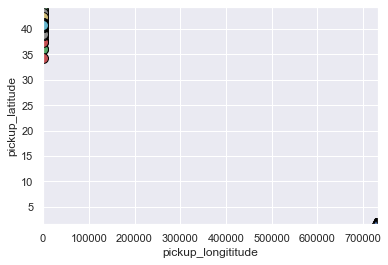

In [324]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(cl_train.iloc[:, 3], cl_train.iloc[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longititude")
plt.ylabel("pickup_latitude")
plt.show()

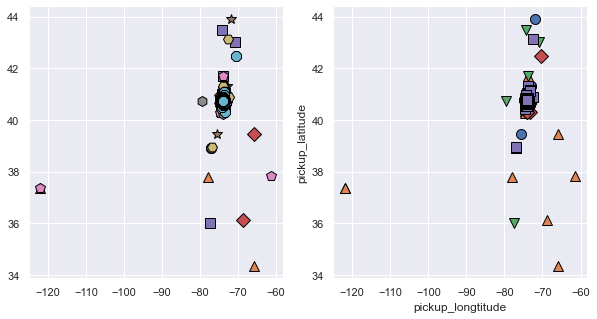

In [325]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(cl_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(cl_train.iloc[:, 3], cl_train.iloc[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(cl_train)
assignments = kmeans.labels_

mglearn.discrete_scatter(cl_train.iloc[:, 3], cl_train.iloc[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

In [326]:
cl_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup,distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,3,14,17,1,1.49852
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,6,12,0,3,1.80551
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,4,6,19,6,1.48550
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,3,26,13,2,1.18859
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,1,30,22,2,1.09894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,417184816,4,17,18,3,3.53756
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,2,2,0,5,2.31745
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,4,8,13,0,1.22508
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,1,5,15,5,1.09256


In [327]:
X=cl_train.drop(['trip_duration'], axis=1)
y=cl_train.trip_duration

In [328]:
# 훈련데이터와 테스트 데이터
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(989403, 14)
(247351, 14)
(989403,)
(247351,)


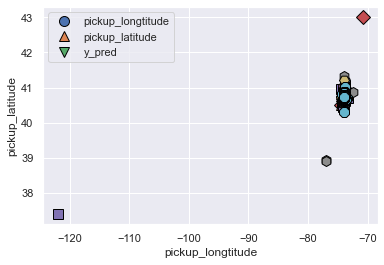

In [329]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test)

mglearn.discrete_scatter(X_test.iloc[:, 3], X_test.iloc[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

In [330]:
X.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'time_pickup', 'month_pickup', 'date_pickup',
       'hour_pickup', 'day_pickup', 'distance'],
      dtype='object')

Text(0, 0.5, 'pickup_latitude')

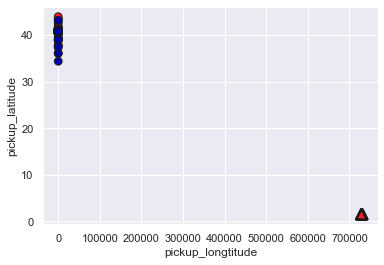

In [331]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X.iloc[:, 3], X.iloc[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께dropoff_longtitude와 dropoff_latitude

dropoff_longtitude와 dropoff_latitude
--

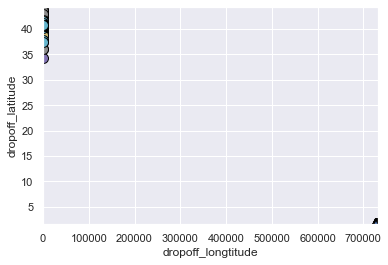

In [332]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

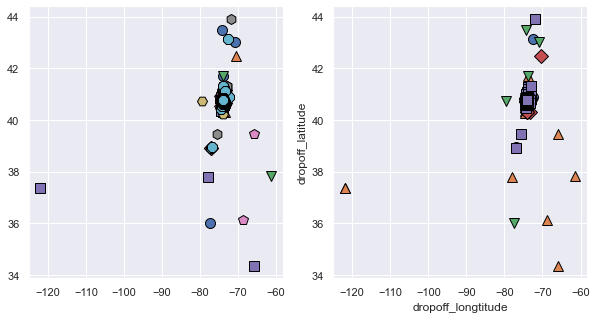

In [333]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

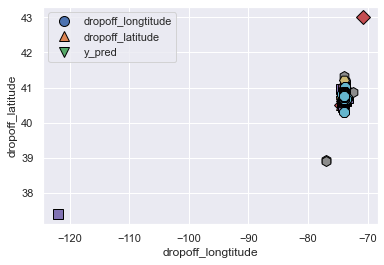

In [334]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test)

mglearn.discrete_scatter(X_test.iloc[:, 5], X_test.iloc[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

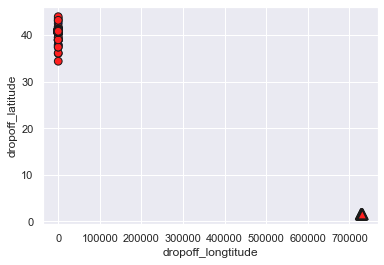

In [335]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X.iloc[:, 5], X.iloc[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

PCA
--

In [336]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 3.71426796e+15  2.09028660e+06  2.06179166e+07 -7.76799311e+05
  -6.88892236e+04 -9.58459029e+05 -3.09229569e+05  2.85461687e+05
   2.18510794e+15  2.09536852e+07  8.91654497e+07  5.81095356e+07
   1.45355148e+07  1.37289214e+07]
 [ 2.09028660e+06  5.21788301e+03  3.98350073e+03  9.30879201e-01
   2.45608269e+00  1.57104289e-01  2.04413020e+00 -5.35092924e+01
  -1.16870257e+10 -1.17192532e+02  2.62814043e+01  5.94491527e+02
   6.11844859e+00  2.22927190e+01]
 [ 2.06179166e+07  3.98350073e+03  3.61004714e+04 -3.73327456e+00
  -1.64006647e+00 -3.39563666e+00 -8.88422481e-01 -3.99135749e+01
  -1.11476560e+10 -1.17395011e+02  5.75135600e+02  1.66767050e+03
  -5.85250673e+02  2.37600007e+02]
 [-7.76799311e+05  9.30879201e-01 -3.73327456e+00  9.55685049e+01
   9.24687493e+00  9.27646537e+01  7.86424410e+00  1.34898597e-01
   4.68053254e+08  5.02147796e+00 -3.35410449e+01 -5.50885675e+01
   2.02635585e+00 -1.07566005e+01]
 [-6.88892236e+04  2.45608269e+00 -1.64006647e+00  9.24687493e+00
  

In [337]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [5.92044947e+20 3.71425990e+15 1.58548118e+06 8.20337380e+05
 8.51464557e+04 4.43563141e+04 3.65877947e+04 4.71240298e+03
 1.90629194e+02 9.93806070e+01 2.55891720e+01 5.36569147e+00
 1.92773042e+00 6.28394760e-06]
eigenvector :
 [[-3.69080365e-06 -1.00000000e+00  2.30024528e-08  1.56822506e-08
   3.39597052e-09 -3.81986470e-09 -5.47993956e-09 -1.41245527e-10
  -3.36354428e-10 -8.25941975e-11  3.45575355e-11  5.77914820e-11
  -1.79093232e-12  1.86166853e-14]
 [ 1.97400856e-11 -5.74386615e-10 -3.18055556e-05 -7.38473722e-04
   5.53996135e-04  3.52328370e-03  1.25843304e-01 -9.91987599e-01
   3.47524054e-04  1.04995943e-02 -6.37204209e-04  1.57343992e-04
  -2.10000790e-05  8.23614535e-09]
 [ 1.88290703e-11 -5.56209339e-09 -3.85857743e-04 -2.12098039e-03
   1.22940771e-02  2.88994657e-02  9.91543657e-01  1.25897444e-01
  -1.83721837e-04 -5.07803363e-05  9.49470911e-05 -2.97155068e-05
  -7.58057465e-06 -1.09621021e-08]
 [-7.90570468e-13  2.09604827e-10  2.17678581e-05  6.70073

In [338]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [9.99993726e-01 6.27357198e-06 2.67795754e-15 1.38559114e-15
 1.43816651e-16 7.49200479e-17 6.17986274e-17 7.95948592e-18
 3.21982307e-19 1.67858849e-19 4.32214000e-20 9.06292307e-21
 3.25603375e-21 1.06139039e-26]


In [339]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [340]:
pca.components_

array([[-3.69080365e-06,  1.97400994e-11,  1.88290703e-11,
        -7.90570468e-13,  8.01769017e-14, -9.54498391e-13,
        -2.30885245e-13,  4.52482958e-13, -1.00000000e+00,
        -9.98203669e-09, -1.79713432e-09,  7.98313301e-11,
        -3.41488001e-10, -1.01782835e-10],
       [-1.00000000e+00, -5.74386515e-10, -5.56209339e-09,
         2.09604827e-10,  1.85000590e-11,  2.58609993e-10,
         8.33905247e-11, -7.71218022e-11,  3.69080365e-06,
         2.31076809e-10, -2.29489844e-08, -1.56919490e-08,
        -3.71253557e-09, -3.63639429e-09],
       [-2.30024527e-08,  3.18047479e-05,  3.85857741e-04,
        -2.17678581e-05, -2.20851403e-05, -2.12869917e-05,
        -2.11468307e-05,  8.69704807e-06, -1.69780587e-09,
        -9.99968084e-03,  9.99943895e-01,  2.42131564e-03,
         2.24079696e-03,  1.08551207e-03],
       [ 1.56822506e-08, -7.38472742e-04, -2.12098038e-03,
         6.70073677e-05, -8.06437098e-05,  7.54967237e-05,
        -1.07528918e-04, -1.43965415e-05, -8.

In [341]:
pca.explained_variance_

array([2.82438384e+16, 1.77190865e+11, 7.56362747e+01, 3.91346578e+01,
       4.06195973e+00, 2.11604300e+00, 1.74544140e+00, 2.24807843e-01,
       9.09407329e-03, 4.74100795e-03, 1.22074590e-03, 2.55973341e-04,
       9.19634680e-05, 2.99795444e-10])

<AxesSubplot:>

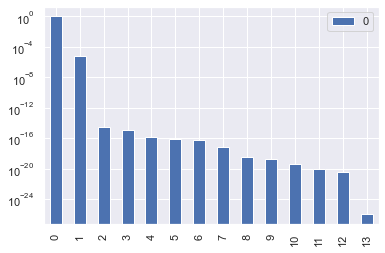

In [342]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC0,9.999937e-01
PC1,6.273572e-06
PC2,2.677958e-15
PC3,1.385591e-15
PC4,1.438167e-16
PC5,7.492005e-17
PC6,6.179863e-17
PC7,7.959486e-18
PC8,3.219823e-19
PC9,1.678588e-19


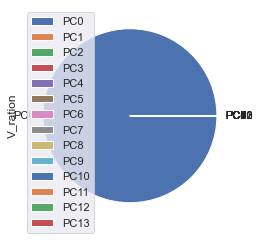

In [346]:
df_v = pd.DataFrame(ratio, index=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [347]:
PC_score = pca.transform(X)
PC_score[:5]

array([[ 5.18498138e+07, -3.19995950e+05, -1.39737463e+00,
        -3.21062235e+00,  1.98009805e+00, -7.78221842e-01,
        -6.08172784e-01, -5.46199391e-01, -1.09975858e-02,
         8.24762273e-05, -1.69016980e-02,  5.80985197e-03,
        -1.10515455e-02,  5.39883281e-06],
       [-2.45982066e+08, -1.37406711e+05, -3.96512471e+00,
         1.37406221e+01, -5.84252092e-02, -4.42542999e-01,
        -6.73300253e-01,  4.34864665e-01,  1.90234844e-02,
        -9.69967504e-03,  2.26266846e-02, -1.21100724e-02,
         8.52462347e-03, -1.31546325e-05],
       [-4.01709630e+07, -5.48720319e+05, -9.55239150e+00,
        -5.27519428e+00, -2.98811220e+00, -7.00640740e-01,
        -5.50166005e-01, -5.41693093e-01,  5.05101325e-02,
         4.86914548e-04,  5.49182888e-02, -6.36834604e-03,
        -2.96564587e-03, -2.48121185e-06],
       [ 3.98892148e+07, -6.68988058e+04,  1.05796843e+01,
         8.05676228e-01,  9.71302168e-01, -1.07760543e+00,
        -5.81210893e-01, -5.47418332e-01, -1.

MinMaxScaler 적용하기
--

In [348]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [349]:
X_scaled=scaler.transform(X)

In [350]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (989403, 14)
스케일 조정 전 특성별 최소값:
 id                    0.000000e+00
vendor_id             1.000000e+00
passenger_count       0.000000e+00
pickup_longitude     -1.219333e+02
pickup_latitude       3.435970e+01
dropoff_longitude    -1.219333e+02
dropoff_latitude      3.435970e+01
store_and_fwd_flag    0.000000e+00
time_pickup           1.010001e+08
month_pickup          1.000000e+00
date_pickup           1.000000e+00
hour_pickup           0.000000e+00
day_pickup            0.000000e+00
distance              0.000000e+00
dtype: float64
스케일 조정 전 특성별 최대값:
 id                    1.458643e+06
vendor_id             2.000000e+00
passenger_count       7.000000e+00
pickup_longitude     -6.133553e+01
pickup_latitude       4.391176e+01
dropoff_longitude    -6.133553e+01
dropoff_latitude      4.391176e+01
store_and_fwd_flag    1.000000e+00
time_pickup           6.302359e+08
month_pickup          6.000000e+00
date_pickup           3.100000e+01
hour_pickup           2.300000e+01
day_pickup    

In [351]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [2.05670613e-06 0.00000000e+00 0.00000000e+00 1.76263002e-06
 3.17167176e-01 1.63672890e-06 3.17146809e-01 0.00000000e+00
 5.32843688e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
스케일 조정 후 특성별 최대값:
 [0.99999863 1.         1.28571429 0.8429632  0.90638842 0.8429631
 0.90638842 1.         0.99999981 1.         1.         1.
 1.         0.99997253]


Pickup_longtitude, Pickup_latitude
--

In [352]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(X_scaled)

print(kmeans.labels_)

print(kmeans.predict(X_scaled))

[7 2 9 ... 8 3 4]
[7 2 9 ... 8 3 4]


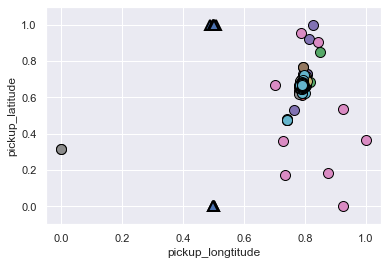

In [353]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

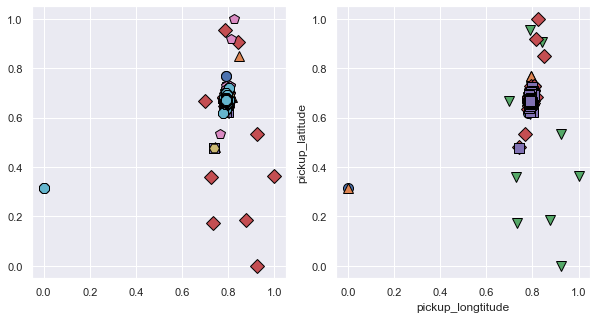

In [354]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

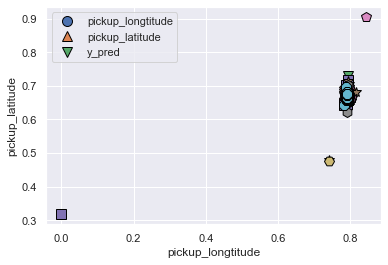

In [355]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test_scaled)

mglearn.discrete_scatter(X_test_scaled[:, 3], X_test_scaled[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

Text(0, 0.5, 'pickup_latitude')

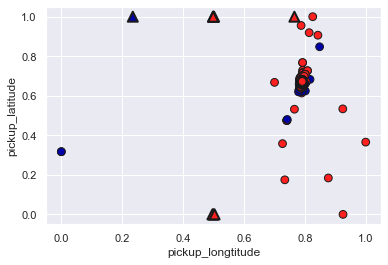

In [356]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X_scaled[:, 3], X_scaled[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

Dropoff_longtitude, Dropoff_latitude
--

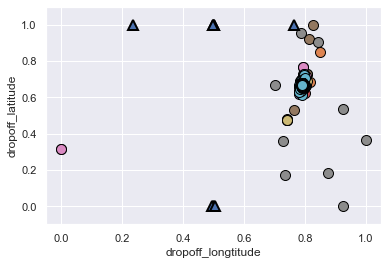

In [357]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

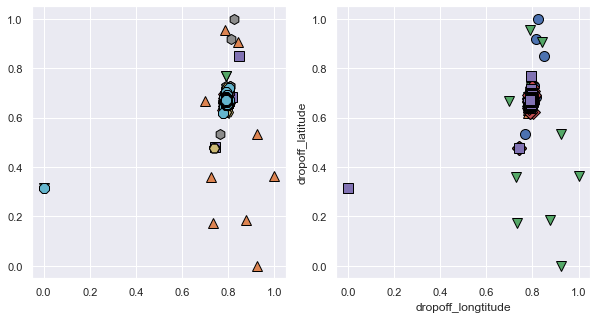

In [358]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

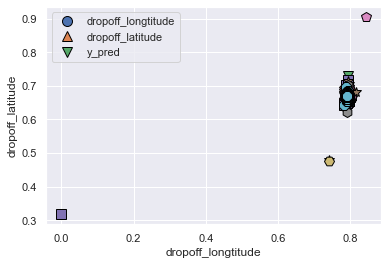

In [359]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test_scaled)

mglearn.discrete_scatter(X_test_scaled[:, 5], X_test_scaled[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

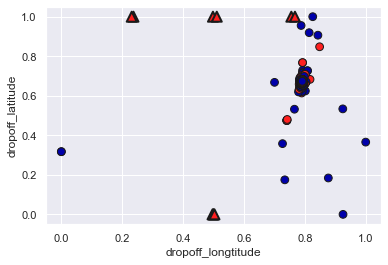

In [360]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X_scaled[:, 5], X_scaled[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

PCA(MinMaxScaler)
--

In [361]:
X_cen = X_scaled - X_scaled.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 1.74572249e+03  1.43303509e+00  2.01928550e+00 -8.78825949e-03
  -4.94430129e-03 -1.08434596e-02 -2.21939525e-02  1.95703600e-01
   2.83057457e+00  2.87303819e+00  2.03763474e+00  1.73209041e+00
   1.66084902e+00  1.36080533e+00]
 [ 1.43303509e+00  5.21788301e+03  5.69071533e+02  1.53615974e-02
   2.57125786e-01  2.59257524e-03  2.13998733e-01 -5.35092924e+01
  -2.20828294e+01 -2.34385064e+01  8.76046810e-01  2.58474577e+01
   1.01974143e+00  3.22308409e+00]
 [ 2.01928550e+00  5.69071533e+02  7.36744315e+02 -8.80105920e-03
  -2.45282214e-02 -8.00509515e-03 -1.32869147e-02 -5.70193927e+00
  -3.00909733e+00 -3.35414318e+00  2.73874095e+00  1.03582019e+01
  -1.39345398e+01  4.90746266e+00]
 [-8.78825949e-03  1.53615974e-02 -8.80105920e-03  2.60256087e-02
   1.59749933e-02  2.52620683e-02  1.35863465e-02  2.22612980e-03
   1.45944938e-02  1.65731327e-02 -1.84500856e-02 -3.95254384e-02
   5.57323706e-03 -2.56641382e-02]
 [-4.94430129e-03  2.57125786e-01 -2.45282214e-02  1.59749933e-02
  

In [362]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [5.29108254e+03 4.47980478e+03 2.36748698e+03 1.74553659e+03
 1.76605988e+03 1.54817323e+03 9.27067468e+02 6.65351495e+02
 9.93806694e+01 3.03320126e-01 4.81464604e-02 4.37832471e-02
 7.02955861e-04 1.18357927e-07]
eigenvector :
 [[-4.28374954e-04 -1.53129149e-03  2.58646348e-03  9.95223769e-01
  -9.71823692e-02  8.39860796e-03 -1.64154149e-03 -1.66476557e-03
  -1.26156126e-04  1.14356438e-05 -5.37121593e-06  7.71553201e-06
  -4.61681270e-07 -3.72667345e-09]
 [-9.91397117e-01 -3.98151108e-02  2.53098853e-04 -6.82193805e-04
   8.83971311e-04  8.20432407e-03 -2.82007414e-03 -1.23933827e-01
   1.05042488e-02 -7.07614428e-05 -9.20410044e-07  1.17511411e-05
  -1.14178851e-06 -3.89089340e-10]
 [-1.23950902e-01 -4.70356681e-03 -7.94755140e-03  1.42453070e-03
  -2.94621635e-03 -7.89829542e-03  1.57922322e-02  9.92082771e-01
  -4.08946282e-04  8.44517039e-05 -1.35799357e-05 -1.83875683e-05
   1.16360974e-07  9.96117969e-09]
 [-2.44099731e-06 -5.03538807e-06  9.45628408e-07 -4.18582

In [363]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [2.80094623e-01 2.37147922e-01 1.25327921e-01 9.24036637e-02
 9.34901075e-02 8.19558179e-02 4.90762733e-02 3.52217858e-02
 5.26092551e-03 1.60568911e-05 2.54873451e-06 2.31775860e-06
 3.72124523e-08 6.26552667e-12]


In [364]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [365]:
pca.components_

array([[-4.28374954e-04, -9.91397117e-01, -1.23950902e-01,
        -2.44099731e-06, -4.79034567e-05, -4.67774398e-08,
        -3.98128122e-05,  1.03484976e-02,  2.75142986e-02,
         2.91327690e-02, -1.05457883e-04, -7.24482230e-03,
         1.39706565e-03, -6.67462523e-04],
       [-1.53129149e-03, -3.98151108e-02, -4.70356681e-03,
        -5.03538807e-06, -1.99013505e-06, -6.15658214e-06,
        -1.34324903e-05,  6.64344387e-04, -6.85745633e-01,
        -7.25364689e-01, -7.97026084e-03,  1.10303607e-03,
        -4.33836227e-02, -6.47772539e-03],
       [-2.58646348e-03, -2.53098853e-04,  7.94755140e-03,
        -9.45628408e-07, -1.46216380e-04,  1.43785508e-08,
        -1.57366093e-04,  3.69020847e-05,  2.88308420e-02,
         3.25059280e-02, -3.27425699e-02, -5.38425774e-02,
        -9.96953781e-01,  1.24194384e-02],
       [ 9.71823692e-02, -8.83971311e-04,  2.94621635e-03,
        -1.13958681e-05, -8.00757606e-05, -1.01979208e-05,
        -7.83511403e-05,  3.10398499e-04,  2.

In [366]:
pca.explained_variance_

array([2.52414079e-01, 2.13711616e-01, 1.12942303e-01, 8.42508834e-02,
       8.32718082e-02, 7.38564780e-02, 4.42262769e-02, 3.17409687e-02,
       4.74101093e-03, 1.44700578e-05, 2.29685407e-06, 2.08870452e-06,
       3.35349062e-08, 5.64652903e-12])

<AxesSubplot:>

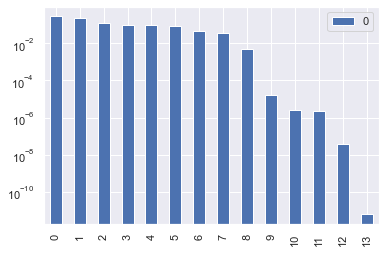

In [367]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC0,2.800946e-01
PC1,2.371479e-01
PC2,1.253279e-01
PC3,9.349011e-02
PC4,9.240366e-02
PC5,8.195582e-02
PC6,4.907627e-02
PC7,3.522179e-02
PC8,5.260926e-03
PC9,1.605689e-05


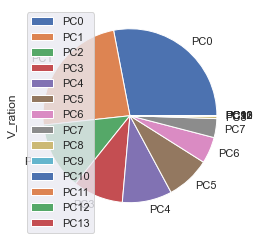

In [368]:
df_v = pd.DataFrame(ratio, index=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [369]:
PC_score = pca.transform(X_scaled)
PC_score[:5]

array([[-4.58626807e-01,  1.37453931e-01,  3.16715743e-01,
        -1.68782440e-02, -2.23612483e-01, -1.50462691e-01,
        -1.12245537e-01, -1.54037995e-01,  1.53369761e-04,
        -1.88707675e-03,  2.10854355e-05,  2.53585169e-04,
        -2.19005564e-04,  7.40934881e-07],
       [ 5.71585425e-01, -6.58700879e-01,  6.32328599e-02,
        -1.15282760e-01, -1.00804546e-01,  5.91979301e-01,
        -5.81040317e-02, -2.15533488e-02, -9.74859276e-03,
         2.57759242e-03, -1.04829835e-04,  4.20792829e-04,
         2.06640741e-04, -1.80535091e-06],
       [-4.47519380e-01, -1.61012760e-01, -4.98943393e-01,
        -2.96156693e-01, -4.06499562e-01, -1.94490969e-01,
        -1.03337693e-01, -1.47455874e-01,  2.81984463e-04,
         6.30798865e-03, -1.27335197e-04,  7.02814727e-04,
        -1.97204743e-05, -3.40523689e-07],
       [-4.56450333e-01,  1.11901602e-01,  1.47366784e-01,
         3.57175389e-01, -1.06646330e-02,  3.39808228e-02,
        -1.57100274e-01, -1.51153442e-01,  2.

StandardScaler 적용하기
--

In [370]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

s_scaler.fit(X_train)

StandardScaler()

In [371]:
s_X_scaled=s_scaler.transform(X)

In [372]:
# 데이터 변환
s_X_train_scaled = s_scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", s_X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", s_X_train_scaled.max(axis=0))

변환된 후 크기: (989403, 14)
스케일 조정 전 특성별 최소값:
 id                    0.000000e+00
vendor_id             1.000000e+00
passenger_count       0.000000e+00
pickup_longitude     -1.219333e+02
pickup_latitude       3.435970e+01
dropoff_longitude    -1.219333e+02
dropoff_latitude      3.435970e+01
store_and_fwd_flag    0.000000e+00
time_pickup           1.010001e+08
month_pickup          1.000000e+00
date_pickup           1.000000e+00
hour_pickup           0.000000e+00
day_pickup            0.000000e+00
distance              0.000000e+00
dtype: float64
스케일 조정 전 특성별 최대값:
 id                    1.458643e+06
vendor_id             2.000000e+00
passenger_count       7.000000e+00
pickup_longitude     -6.133553e+01
pickup_latitude       4.391176e+01
dropoff_longitude    -6.133553e+01
dropoff_latitude      4.391176e+01
store_and_fwd_flag    1.000000e+00
time_pickup           6.302359e+08
month_pickup          6.000000e+00
date_pickup           3.100000e+01
hour_pickup           2.300000e+01
day_pickup    

In [373]:
# 테스트 데이터 변환
s_X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", s_X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", s_X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [2.05670613e-06 0.00000000e+00 0.00000000e+00 1.76263002e-06
 3.17167176e-01 1.63672890e-06 3.17146809e-01 0.00000000e+00
 5.32843688e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
스케일 조정 후 특성별 최대값:
 [0.99999863 1.         1.28571429 0.8429632  0.90638842 0.8429631
 0.90638842 1.         0.99999981 1.         1.         1.
 1.         0.99997253]


Pickup_longtitude, Pickup_latitude
--

In [374]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)

print(kmeans.labels_)

print(kmeans.predict(s_X_scaled))

[2 3 3 ... 0 8 9]
[2 3 3 ... 0 8 9]


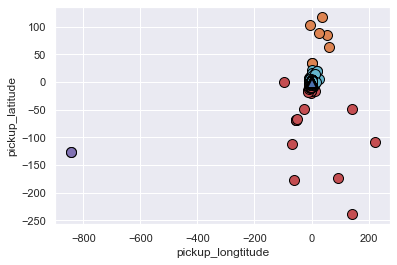

In [375]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

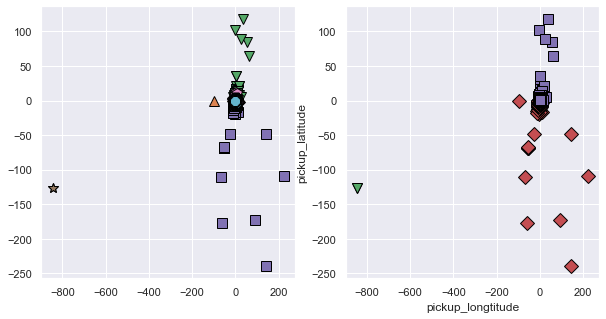

In [376]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

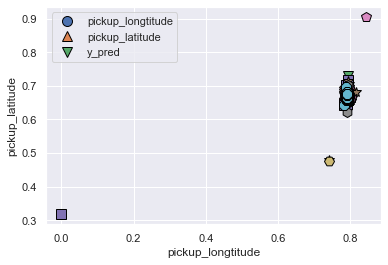

In [729]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(s_X_test_scaled)

mglearn.discrete_scatter(s_X_test_scaled[:, 3], s_X_test_scaled[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

Text(0, 0.5, 'pickup_latitude')

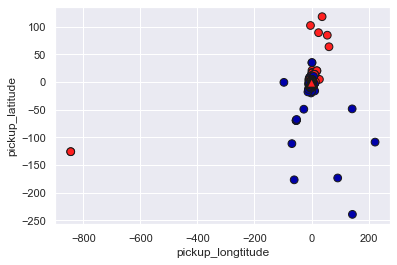

In [730]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
y_pred = kmeans.predict(s_X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

Dropoff_longtitude, Dropoff_latitude
--

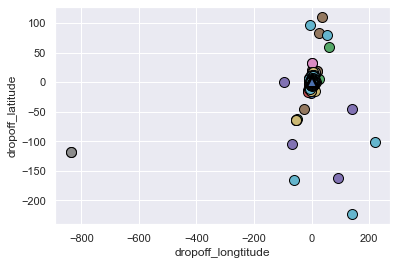

In [379]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

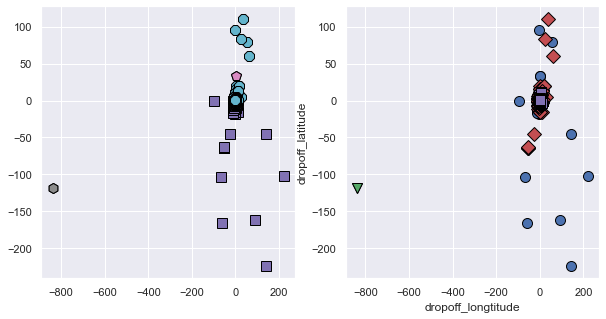

In [380]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

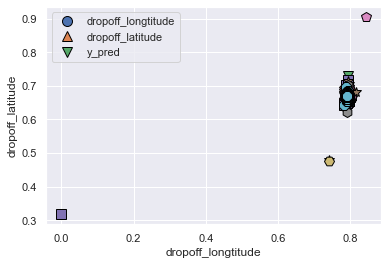

In [381]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(s_X_test_scaled)

mglearn.discrete_scatter(s_X_test_scaled[:, 5], s_X_test_scaled[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

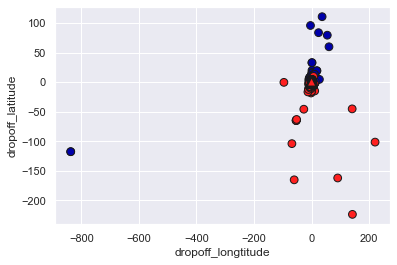

In [382]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
y_pred = kmeans.predict(s_X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

PCA(StandardScaler)
--

In [383]:
X_cen = s_X_scaled - s_X_scaled.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 2.09620577e+04  9.95307132e+00  3.73157241e+01 -3.24770196e+01
  -6.12121627e+00 -3.97440840e+01 -2.57244915e+01  9.77217186e+00
   3.08807990e+01  2.96258019e+01  2.43406773e+01  2.20601788e+01
   1.71188300e+01  2.23963241e+01]
 [ 9.95307132e+00  2.09621688e+04  6.08278678e+03  3.28360766e+01
   1.84128076e+02  5.49639049e+00  1.43471268e+02 -1.54547888e+03
  -1.39351045e+02 -1.39797767e+02  6.05306335e+00  1.90413568e+02
   6.07960797e+00  3.06827277e+01]
 [ 3.73157241e+01  6.08278678e+03  2.09530081e+04 -5.00545636e+01
  -4.67341444e+01 -4.51550748e+01 -2.37012765e+01 -4.38177739e+02
  -5.05225898e+01 -5.32286872e+01  5.03492166e+01  2.03029097e+02
  -2.21040573e+02  1.24300590e+02]
 [-3.24770196e+01  3.28360766e+01 -5.00545636e+01  2.95998003e+04
   6.08678653e+03  2.84962768e+04  4.84651345e+03  3.42103371e+01
   4.90024231e+01  5.25954184e+01 -6.78296062e+01 -1.54927944e+02
   1.76793393e+01 -1.29993614e+02]
 [-6.12121627e+00  1.84128076e+02 -4.67341444e+01  6.08678653e+03
  

In [384]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [6.24045230e+04 4.19202646e+04 7.58906986e+02 5.49637320e+03
 1.11107774e-06 3.20723824e+04 2.73506657e+04 1.47635255e+04
 2.14376149e+04 2.01763701e+04 2.04901204e+04 2.09677624e+04
 2.09306845e+04 2.08217336e+04]
eigenvector :
 [[-1.34504474e-03  2.09690521e-03  1.23271841e-04  9.82033927e-04
  -3.29505080e-09 -2.73507935e-04 -5.03371784e-03 -2.76433940e-03
   7.47920298e-02 -8.47760463e-03 -1.63444727e-02  9.16617738e-01
  -3.59098298e-01 -1.57756886e-01]
 [ 2.42453488e-03 -1.14844760e-02  5.55523067e-04  3.08839897e-03
  -5.94754625e-10  2.64570388e-02 -6.99203784e-01 -7.10741608e-01
   8.75554078e-05  2.89735230e-02  6.39376699e-02 -5.79099519e-03
   2.15635229e-03 -1.21308724e-02]
 [-1.67623771e-03 -7.10117943e-03  1.58357718e-05 -2.15081830e-03
   5.72289689e-09  1.12171492e-02 -6.81456099e-01  6.90249413e-01
  -7.15932784e-03  2.28703425e-02  2.23324913e-01  2.12559902e-02
   6.85280666e-03  8.96802190e-02]
 [ 6.56392305e-01 -2.86929441e-03 -6.87442056e-01 -1.61263

In [385]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [2.01570904e-01 1.35405339e-01 2.45132179e-03 1.77536637e-02
 3.58885756e-12 1.03596002e-01 8.83445325e-02 4.76872032e-02
 6.92449715e-02 6.51710639e-02 6.61844989e-02 6.77273155e-02
 6.76075514e-02 6.72556324e-02]


In [386]:
pca = PCA()
pca.fit(s_X_scaled)

PCA()

In [387]:
pca.components_

array([[ 1.34504474e-03, -2.42453488e-03,  1.67623771e-03,
        -6.56392305e-01, -2.68747658e-01, -6.53082625e-01,
        -2.65021307e-01, -4.59509240e-04, -3.75416701e-03,
        -3.95897192e-03,  3.92570734e-03, -5.49922659e-04,
        -5.16478295e-03,  9.36833021e-03],
       [ 2.09690521e-03, -1.14844760e-02, -7.10117943e-03,
        -2.86929441e-03, -4.82854836e-03, -2.09204670e-03,
        -3.32072641e-03, -5.17484014e-04,  7.06490104e-01,
         7.06132651e-01,  1.30173665e-02, -2.64544310e-03,
         3.96171184e-02,  1.63862633e-02],
       [ 2.73507935e-04, -2.64570388e-02, -1.12171492e-02,
         2.56929554e-01, -6.38128622e-01,  2.68542261e-01,
        -6.42960995e-01,  1.36975226e-02, -3.79659594e-03,
        -4.52721832e-03,  1.45034736e-02, -5.97442042e-02,
        -4.54367285e-02,  1.85398644e-01],
       [ 5.03371784e-03,  6.99203784e-01,  6.81456099e-01,
         6.73841461e-03, -1.69973605e-02,  7.02231635e-03,
        -1.74261434e-02, -2.08216777e-01,  9.

In [388]:
pca.explained_variance_

array([2.97704300e+00, 1.99982988e+00, 1.53003111e+00, 1.30477895e+00,
       1.02269352e+00, 1.00027894e+00, 9.98510121e-01, 9.93312555e-01,
       9.77492760e-01, 9.62525125e-01, 7.04302316e-01, 2.62207586e-01,
       3.62040862e-02, 5.30055302e-11])

<AxesSubplot:>

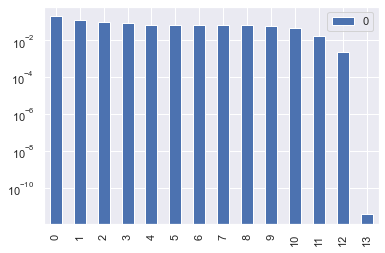

In [389]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC0,2.015709e-01
PC1,1.354053e-01
PC2,1.035960e-01
PC3,8.834453e-02
PC4,6.924497e-02
PC5,6.772732e-02
PC6,6.760755e-02
PC7,6.725563e-02
PC8,6.618450e-02
PC9,6.517106e-02


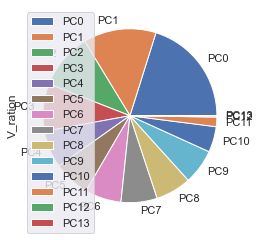

In [390]:
df_v = pd.DataFrame(ratio, index=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [391]:
PC_score = pca.transform(s_X_scaled)
PC_score[:5]

array([[-4.03192228e-01, -4.90796265e-01, -6.90574672e-01,
         3.34511245e-01, -3.90707761e-01, -6.86539864e-01,
         4.89027335e-01, -1.92362207e-01, -2.03425961e-01,
         9.82696808e-01, -1.02205568e+00, -2.86041208e-02,
        -2.29778692e-01,  2.27012506e-06],
       [ 5.76976645e-01,  2.10125240e+00,  8.21759929e-01,
        -1.11916552e+00, -1.57651773e+00, -4.02163540e-01,
        -2.76102562e-01,  1.20795865e+00,  2.86312774e-01,
        -8.58008260e-01,  4.12778549e-01, -2.06455353e-01,
         2.08976928e-01, -5.53135060e-06],
       [ 1.47025108e+00,  4.21249950e-01,  1.27931128e+00,
         3.59631859e-01,  1.20256930e+00, -3.47017572e-01,
         1.96174006e+00,  1.20015151e+00,  2.91041616e-01,
        -7.34112960e-02, -9.83206899e-01, -2.69604383e-01,
        -2.92537823e-02, -1.04331794e-06],
       [-8.24706837e-01, -4.12683250e-01, -1.67663131e+00,
         2.75399313e-01, -5.10878017e-02, -5.76319842e-01,
        -1.12057871e+00,  1.83512883e-01, -3.

StandardScaler의 결과를 K-means를 이용하여 군집화 하기
--

StandardScaler 위경도 적용

In [392]:
s_X_scaled

array([[ 0.76031691,  0.93627051, -0.50329912, ...,  0.51713527,
        -0.98876858, -0.4988491 ],
       [ 0.32916229, -1.06806739, -0.50329912, ..., -2.19949293,
         0.00273278, -0.2880425 ],
       [ 1.30449015,  0.93627051, -0.50329912, ...,  0.83673859,
         1.48998484, -0.50778979],
       ...,
       [ 0.32800773,  0.93627051,  1.78223657, ..., -0.12207136,
        -1.48451927, -0.6866173 ],
       [ 0.62072915, -1.06806739, -0.50329912, ...,  0.19753195,
         0.99423415, -0.7776173 ],
       [-0.68218262, -1.06806739, -0.50329912, ...,  0.03773029,
         0.99423415, -0.74913345]])

In [427]:
i=0
p_lon=[]
p_la=[]
d_lon=[]
d_la=[]


for i in range(0,1236754):
    p_lon.append(s_X_scaled[i][3])
    p_la.append(s_X_scaled[i][4])
    d_lon.append(s_X_scaled[i][5])
    d_la.append(s_X_scaled[i][6])
    i+=1

In [428]:
p_lon=pd.Series(p_lon)
p_la=pd.Series(p_la) 
d_lon=pd.Series(d_lon)
d_la=pd.Series(d_la) 

In [429]:
df_p_lon=pd.DataFrame(p_lon, columns=['p_lon'])
df_p_la=pd.DataFrame(p_la, columns=['p_la'])
df_d_lon=pd.DataFrame(d_lon, columns=['d_lon'])
df_d_la=pd.DataFrame(d_la, columns=['d_la'])

In [430]:
tn=pd.concat([df_p_lon,df_p_la,df_d_lon,df_d_la], axis=1)

In [431]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

s_scaler.fit(cl_test)
s_test_scaled=s_scaler.transform(cl_test)

In [433]:
i=0
p_lon=[]
p_la=[]
d_lon=[]
d_la=[]


for i in range(0,625134):
    p_lon.append(s_test_scaled[i][3])
    p_la.append(s_test_scaled[i][4])
    d_lon.append(s_test_scaled[i][5])
    d_la.append(s_test_scaled[i][6])
    i+=1

In [434]:
p_lon=pd.Series(p_lon)
p_la=pd.Series(p_la)
d_lon=pd.Series(d_lon)
d_la=pd.Series(d_la)

In [435]:
df_p_lon=pd.DataFrame(p_lon, columns=['p_lon'])
df_p_la=pd.DataFrame(p_la, columns=['p_la'])
df_d_lon=pd.DataFrame(d_lon, columns=['d_lon'])
df_d_la=pd.DataFrame(d_la, columns=['d_la'])

In [436]:
te=pd.concat([df_p_lon,df_p_la,df_d_lon,df_d_la], axis=1)

K-means를 이용하여 군집화하기


In [437]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(tn[['p_lon','p_la']])
pickup_clusters = kmeans.predict(tn[['p_lon','p_la']])
pickup_clusters

cl_train['pickup_clusters']=pickup_clusters

In [438]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(tn[['d_lon','d_la']])
dropoff_clusters = kmeans.predict(tn[['d_lon','d_la']])
dropoff_clusters

cl_train['dropoff_clusters']=dropoff_clusters

In [439]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(te[['p_lon','p_la']])
pickup_clusters = kmeans.predict(te[['p_lon','p_la']])
pickup_clusters

cl_test['pickup_clusters']=pickup_clusters

In [440]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(te[['d_lon','d_la']])
dropoff_clusters = kmeans.predict(te[['d_lon','d_la']])
dropoff_clusters

cl_test['dropoff_clusters']=dropoff_clusters

군집화 결과 시각화
--

1. train

- pick up

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

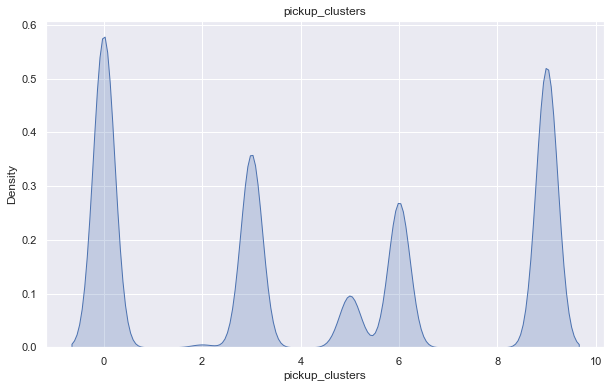

In [443]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=cl_train['pickup_clusters'], shade=True)

- drop off

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

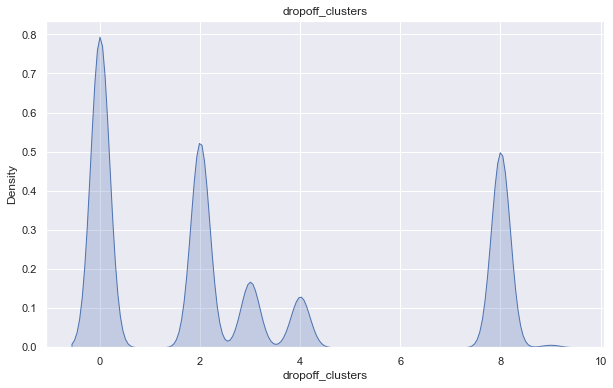

In [444]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=cl_train['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

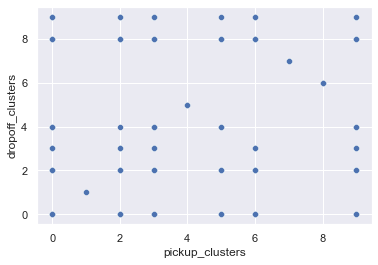

In [445]:
tn_pickup_dropoff=cl_train.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(tn_pickup_dropoff['pickup_clusters'], tn_pickup_dropoff['dropoff_clusters'])

2. test

- pickup

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

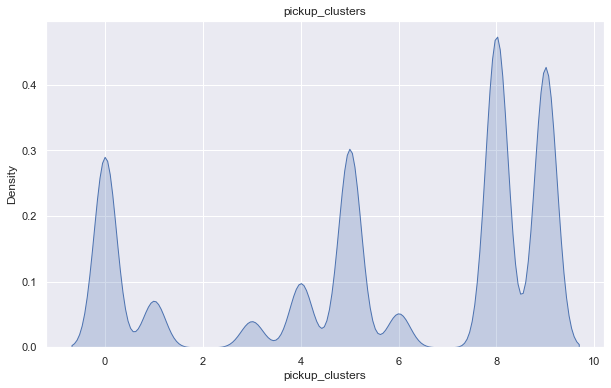

In [446]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=cl_test['pickup_clusters'], shade=True)

- drop off

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

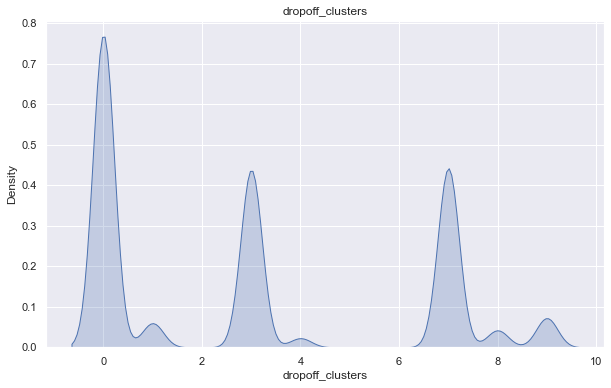

In [447]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=cl_test['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

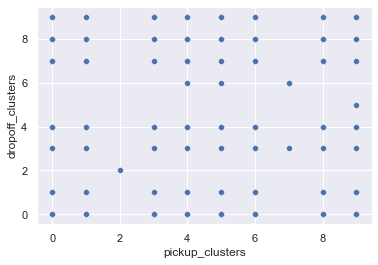

In [448]:
te_pickup_dropoff=cl_test.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(te_pickup_dropoff['pickup_clusters'], te_pickup_dropoff['dropoff_clusters'])

군집 분석 결과 One-Hot Encoding
--

In [449]:
pickup_clusters_tn = pd.get_dummies(cl_train['pickup_clusters'], prefix='pickup_cluster')
dropoff_clusters_tn = pd.get_dummies(cl_train['dropoff_clusters'], prefix='dropoff_cluster')
pickup_clusters_te = pd.get_dummies(cl_test['pickup_clusters'], prefix='pickup_cluster')
dropoff_clusters_te = pd.get_dummies(cl_test['dropoff_clusters'], prefix='dropoff_cluster')

In [450]:
clusters_tn=pickup_clusters_tn.join(dropoff_clusters_tn)
clusters_te=pickup_clusters_te.join(dropoff_clusters_te)

Train 지점별 상관관계
--

출발 지점

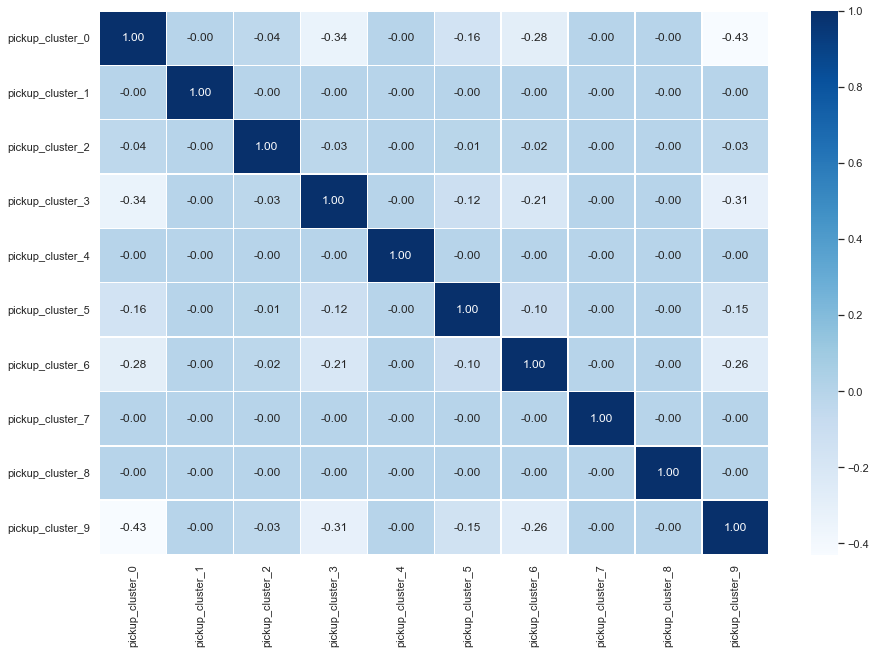

In [451]:
plt.figure(figsize=(15,10))
sns.heatmap(data=pickup_clusters_tn.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

도착 지점

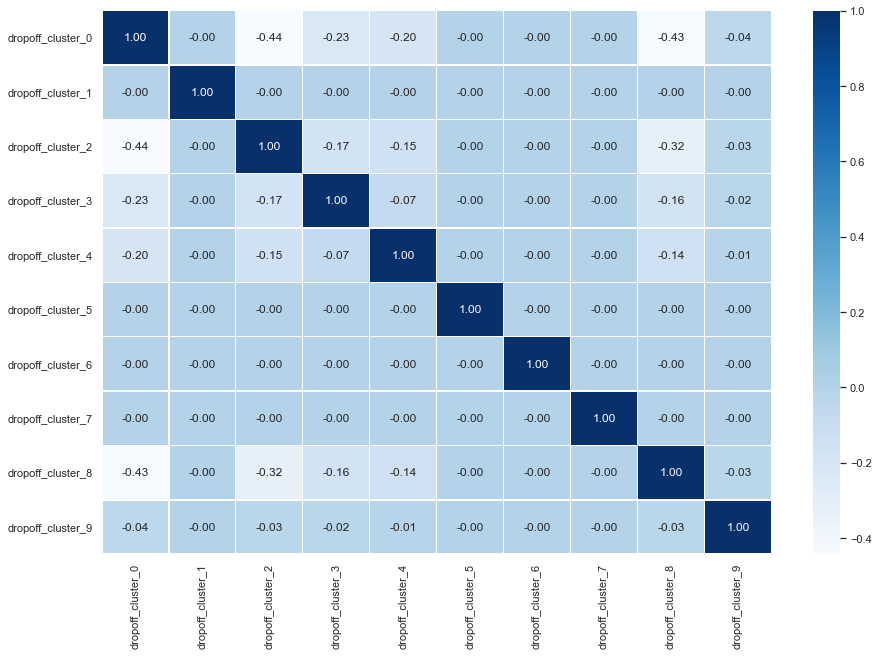

In [452]:
plt.figure(figsize=(15,10))
sns.heatmap(data=dropoff_clusters_tn.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

각 지점 별 상관관계

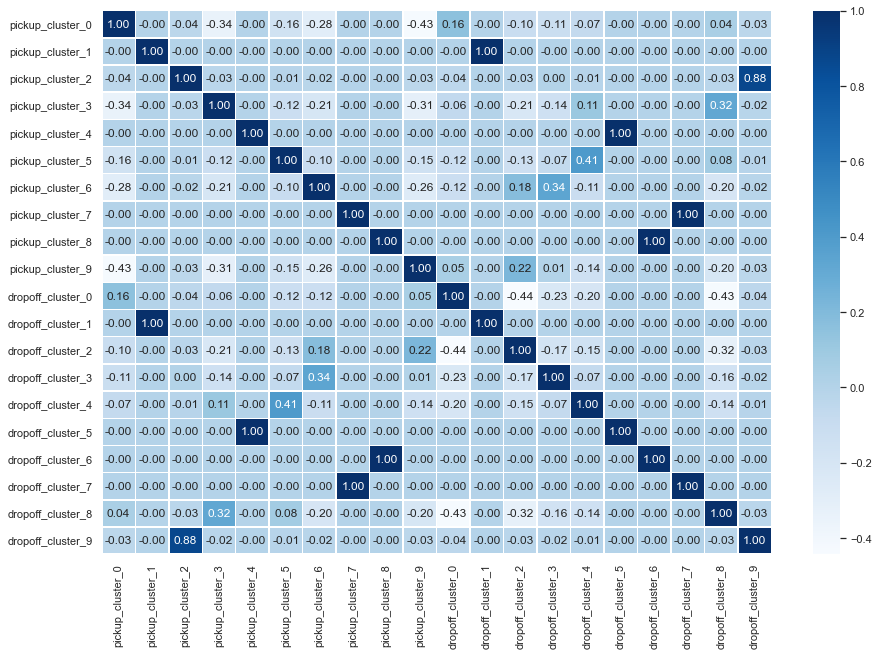

In [453]:
plt.figure(figsize=(15,10))
sns.heatmap(data=clusters_tn.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

test 지점별 상관관계
--

출발지점

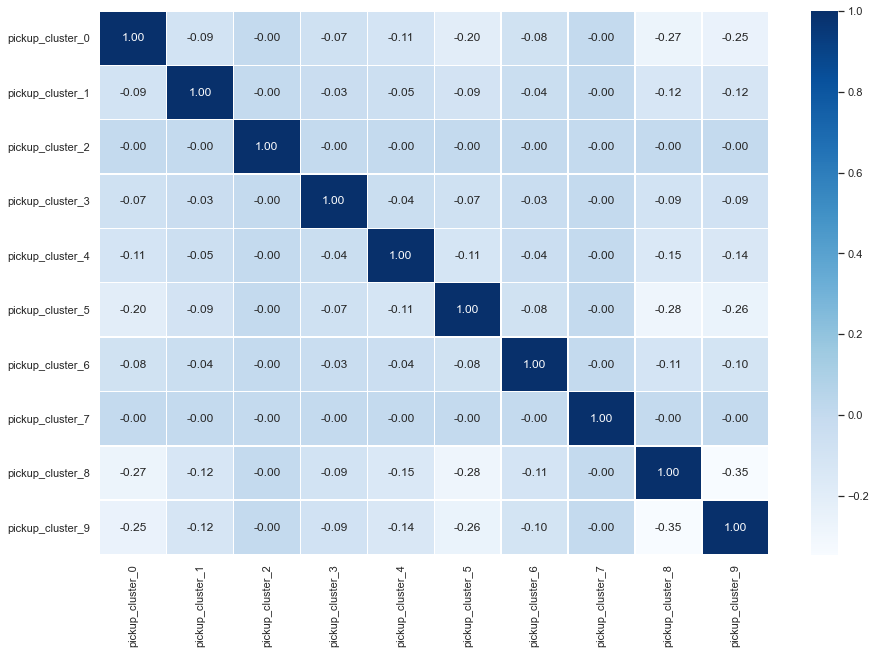

In [454]:
plt.figure(figsize=(15,10))
sns.heatmap(data=pickup_clusters_te.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

도착 지점

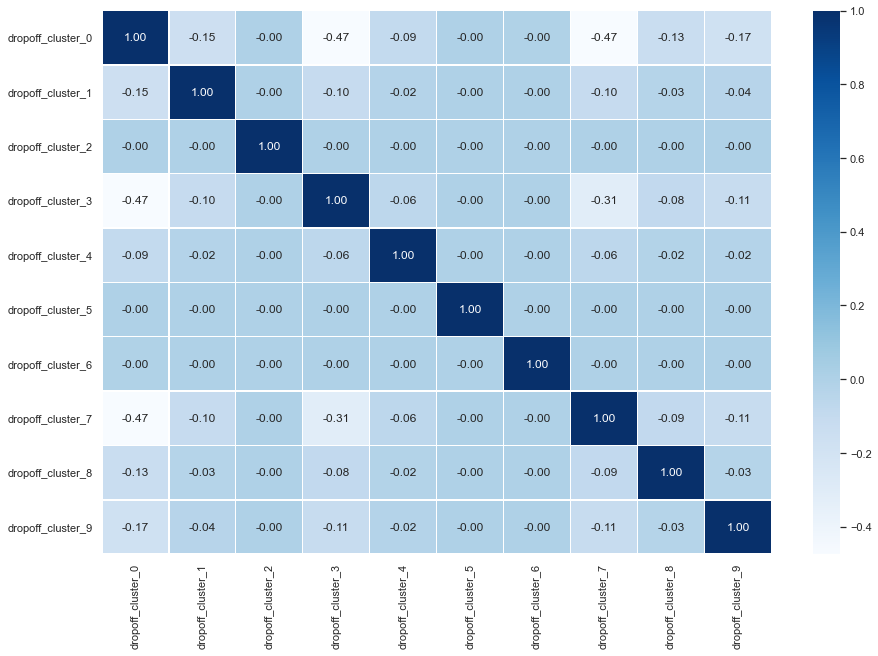

In [455]:
plt.figure(figsize=(15,10))
sns.heatmap(data=dropoff_clusters_te.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

각 지점 별 상관관계

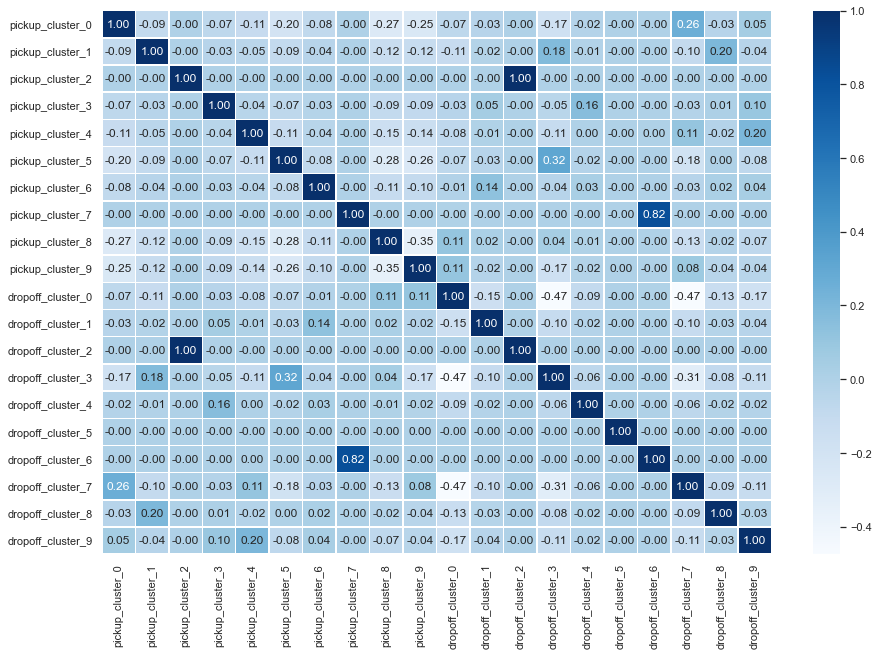

In [456]:
plt.figure(figsize=(15,10))
sns.heatmap(data=clusters_te.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

Second Solution Process
--

Machine learning( Classification)
--

In [611]:
cl_test=cl_test.join(clusters_te)

In [612]:
cl_train=cl_train.join(clusters_tn)

In [614]:
c_train=cl_train.drop(['pickup_longitude','dropoff_longitude','pickup_latitude',
                'dropoff_latitude',
                'id','time_pickup','month_pickup','date_pickup',
                 'hour_pickup','day_pickup'], axis=1)
c_train

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,time_dropoff,distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,...,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5,dropoff_cluster_6,dropoff_cluster_7,dropoff_cluster_8,dropoff_cluster_9
0,2,1,0,455,314173230,1.49852,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,663,612005438,1.80551,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2,1,0,429,406193940,1.48550,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,1,0,435,326133810,1.18859,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2,6,0,443,130220903,1.09894,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,1,1,0,760,417190056,3.53756,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1458638,2,5,0,414,202004633,2.31745,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1458639,2,4,0,778,408134402,1.22508,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1458642,1,1,0,373,105160239,1.09256,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [618]:
c_test=cl_test.drop(['pickup_longitude','dropoff_longitude','pickup_latitude',
                'dropoff_latitude',
                 'id','time_pickup','month_pickup','date_pickup',
                 'hour_pickup','day_pickup'], axis=1)

c_test

,vendor_id,passenger_count,store_and_fwd_flag,distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,...,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5,dropoff_cluster_6,dropoff_cluster_7,dropoff_cluster_8,dropoff_cluster_9
0,1,1,1,2.74643,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,2.75924,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1.30616,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,5.26909,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,0.96084,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,1,1,0.96744,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
625130,1,1,1,6.19634,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
625131,1,2,1,8.15372,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
625132,1,1,1,20.38075,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [620]:
y=c_train.trip_duration

One-hot Encoding
--

In [621]:
vendor_id_tn = pd.get_dummies(c_train['vendor_id'], prefix='vendor_id')
passenger_count_tn = pd.get_dummies(c_train['passenger_count'], prefix='passenger_count')
store_and_fwd_flag_tn = pd.get_dummies(c_train['store_and_fwd_flag'], prefix='store_and_fwd_flag')

vendor_id_te = pd.get_dummies(c_test['vendor_id'], prefix='vendor_id')
passenger_count_te = pd.get_dummies(c_test['passenger_count'], prefix='passenger_count')
store_and_fwd_flag_te = pd.get_dummies(c_test['store_and_fwd_flag'], prefix='store_and_fwd_flag')

c_train=c_train.join(vendor_id_tn)
c_train=c_train.join(passenger_count_tn)
c_train=c_train.join(store_and_fwd_flag_tn)

c_test=c_test.join(vendor_id_te)
c_test=c_test.join(passenger_count_te)
c_test=c_test.join(store_and_fwd_flag_te)

In [629]:
X_train=c_train.drop(['vendor_id','passenger_count','store_and_fwd_flag','trip_duration',
                     'time_dropoff'], axis=1)
X_train

,distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,pickup_cluster_6,pickup_cluster_7,pickup_cluster_8,...,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9,store_and_fwd_flag_0,store_and_fwd_flag_1
0,1.49852,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1.80551,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1.48550,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1.18859,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,1.09894,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,3.53756,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1458638,2.31745,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1458639,1.22508,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458642,1.09256,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [652]:
X_test=c_test.drop(['vendor_id','passenger_count','store_and_fwd_flag'], axis=1)

In [653]:
i=0
p7=[]
p8=[]
sf=[]

for i in range(0,625134):
    p7.append(0)
    p8.append(0)
    sf.append(0)
    i+=1

In [654]:
p7=pd.Series(p7)
p8=pd.Series(p8)
sf=pd.Series(sf)

X_test['passenger_count_7']=p7
X_test['passenger_count_8']=p8
X_test['store_and_fwd_flag_0']=sf

X_test=X_test[['distance', 'pickup_cluster_0', 'pickup_cluster_1', 'pickup_cluster_2',
       'pickup_cluster_3', 'pickup_cluster_4', 'pickup_cluster_5',
       'pickup_cluster_6', 'pickup_cluster_7', 'pickup_cluster_8',
       'pickup_cluster_9', 'dropoff_cluster_0', 'dropoff_cluster_1',
       'dropoff_cluster_2', 'dropoff_cluster_3', 'dropoff_cluster_4',
       'dropoff_cluster_5', 'dropoff_cluster_6', 'dropoff_cluster_7',
       'dropoff_cluster_8', 'dropoff_cluster_9', 'vendor_id_1', 'vendor_id_2',
       'passenger_count_0', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'passenger_count_7', 'passenger_count_9',
       'store_and_fwd_flag_0', 'store_and_fwd_flag_1']]
X_test

,distance,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,pickup_cluster_6,pickup_cluster_7,pickup_cluster_8,...,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9,store_and_fwd_flag_0,store_and_fwd_flag_1
0,2.74643,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2.75924,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.30616,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,5.26909,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.96084,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,0.96744,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
625130,6.19634,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
625131,8.15372,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
625132,20.38075,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [656]:
y_train=c_train.trip_duration
y_train

0          455
1          663
3          429
4          435
5          443
          ... 
1458637    760
1458638    414
1458639    778
1458642    373
1458643    198
Name: trip_duration, Length: 1236754, dtype: int64

XGBoost
--

In [685]:
from xgboost import XGBClassifier
import xgboost as xgb
import tqdm
import timeit
from tqdm import tqdm
from tqdm import notebook
from tqdm import tqdm_notebook
from time import sleep

xgb_reg=xgb.XGBRegressor(random_state=42)


tqdm_notebook(xgb_reg.fit(X_train, y_train))
%time
XGBscore_train = xgb_reg.score(X_train, y_train) # train set 정확도

print('XGboosting train 점수는 {:.3f}'.format(XGBscore_train))

Wall time: 0 ns
XGboosting train 점수는 0.549


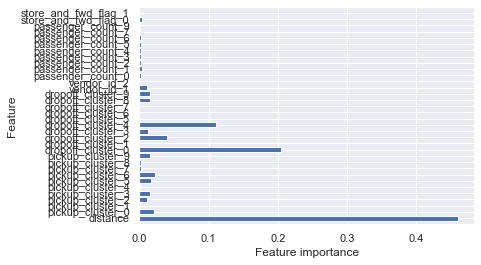

In [686]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(xgb_reg)

In [687]:
pred=reg.predict(X_test)

In [688]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [689]:
submission

,id,trip_duration
0,id3004672,1065.159211
1,id3505355,688.892602
2,id1217141,465.418846
3,id2150126,1204.901231
4,id1598245,427.581301
...,...,...
625129,id3008929,364.177970
625130,id3700764,1406.789709
625131,id2568735,1457.285155
625132,id1384355,1358.837158


- 채점 점수가 0.56225점으로 회귀분석보다 약간 낮다.

In [662]:
#submission.to_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/submission(xgb).csv', index=False)

Lightgbm
--

In [690]:
from lightgbm import LGBMClassifier  
import lightgbm as lgbm

lgbm_reg = lgbm.LGBMRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

lgbm_reg.fit(X_train, y_train)
%time
LGBMscore_train = lgbm_reg.score(X_train, y_train) # train set 정확도

print('lightgbm train 점수는 {:.3f}'.format(LGBMscore_train))


Wall time: 0 ns
lightgbm train 점수는 0.546


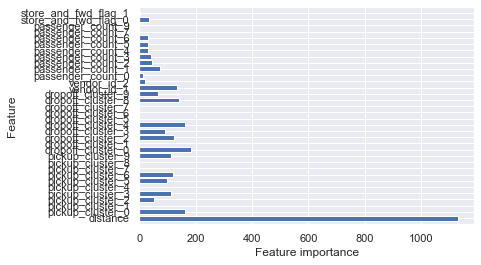

In [691]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(reg)

In [692]:
pred=reg.predict(X_test)

In [693]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [694]:
submission

,id,trip_duration
0,id3004672,1065.159211
1,id3505355,688.892602
2,id1217141,465.418846
3,id2150126,1204.901231
4,id1598245,427.581301
...,...,...
625129,id3008929,364.177970
625130,id3700764,1406.789709
625131,id2568735,1457.285155
625132,id1384355,1358.837158


- 채점 결과 점수가 0.53620점으로 제일 좋다

In [668]:
#submission.to_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/submission(lgbm).csv', index=False)

Cat boosting
--

In [695]:
from catboost import CatBoostClassifier
import catboost as cb

cb_reg= cb.CatBoostRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

cb_reg.fit(X_train, y_train)
%time
CBscore_train = cb_reg.score(X_train, y_train) # train set 정확도

print('CatBoosting train 점수는 {:.3f}'.format(CBscore_train))

Learning rate set to 0.13862
0:	learn: 371.1979266	total: 94.4ms	remaining: 1m 34s
1:	learn: 349.5803160	total: 187ms	remaining: 1m 33s
2:	learn: 332.5422458	total: 277ms	remaining: 1m 32s
3:	learn: 318.8355134	total: 365ms	remaining: 1m 30s
4:	learn: 308.0830127	total: 456ms	remaining: 1m 30s
5:	learn: 299.6884210	total: 541ms	remaining: 1m 29s
6:	learn: 293.1886975	total: 638ms	remaining: 1m 30s
7:	learn: 288.1657329	total: 732ms	remaining: 1m 30s
8:	learn: 284.1839453	total: 824ms	remaining: 1m 30s
9:	learn: 281.1419346	total: 923ms	remaining: 1m 31s
10:	learn: 278.7953175	total: 1.02s	remaining: 1m 31s
11:	learn: 276.9905290	total: 1.11s	remaining: 1m 31s
12:	learn: 275.5717581	total: 1.2s	remaining: 1m 31s
13:	learn: 274.4725883	total: 1.29s	remaining: 1m 30s
14:	learn: 273.6523064	total: 1.38s	remaining: 1m 30s
15:	learn: 272.9845283	total: 1.47s	remaining: 1m 30s
16:	learn: 272.4970762	total: 1.56s	remaining: 1m 30s
17:	learn: 272.0214129	total: 1.65s	remaining: 1m 30s
18:	learn

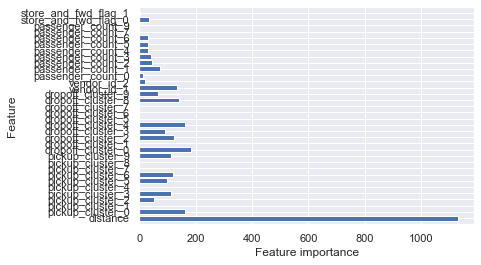

In [696]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(reg)

In [697]:
pred=reg.predict(X_test)

In [698]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [699]:
submission

,id,trip_duration
0,id3004672,1065.159211
1,id3505355,688.892602
2,id1217141,465.418846
3,id2150126,1204.901231
4,id1598245,427.581301
...,...,...
625129,id3008929,364.177970
625130,id3700764,1406.789709
625131,id2568735,1457.285155
625132,id1384355,1358.837158


- 0.58427점으로 boosting중에서는 가장 낮다.

In [675]:
#submission.to_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/submission(cb).csv', index=False)

Lightgbm 하이퍼파라미터로 튜닝하기
--

In [676]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[1,10,100], 'max_features':[1,5,10]},
           {'bootstrap':[False],'learning_rate':[0.1,0.05,0.01],'max_depth':[1,5,10],
           'sub_sample':[0.5,0.7,1.0]},]

lgbm_reg=lgbm.LGBMRegressor(random_state=42, bootstrap=False) 
grid_search=GridSearchCV(lgbm_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score= True)
grid_search.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Un

GridSearchCV(cv=5, estimator=LGBMRegressor(bootstrap=False, random_state=42),
             param_grid=[{'max_features': [1, 5, 10],
                          'n_estimators': [1, 10, 100]},
                         {'bootstrap': [False],
                          'learning_rate': [0.1, 0.05, 0.01],
                          'max_depth': [1, 5, 10],
                          'sub_sample': [0.5, 0.7, 1.0]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [677]:
grid_search.best_params_

{'max_features': 1, 'n_estimators': 100}

Lightgbm 하이퍼파라미터 튜닝 적용하기
--

In [678]:
from lightgbm import LGBMClassifier  
import lightgbm as lgbm

reg = lgbm.LGBMRegressor(random_state=42, max_features=1, n_estimators=100) # 기본값: max_depth=3, learning_rate=0.1

reg.fit(X_train, y_train)
%time
LGBMscore_train = reg.score(X_train, y_train) # train set 정확도

print('lightgbm train 점수는 {:.3f}'.format(LGBMscore_train))


Wall time: 0 ns
lightgbm train 점수는 0.546


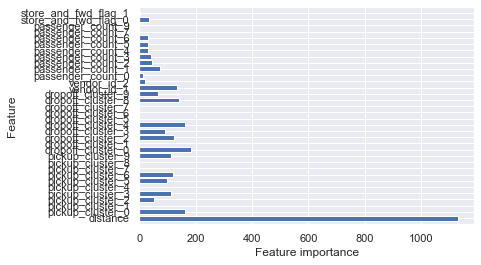

In [679]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(reg)

In [680]:
pred=reg.predict(X_test)

In [681]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [682]:
submission

,id,trip_duration
0,id3004672,1065.159211
1,id3505355,688.892602
2,id1217141,465.418846
3,id2150126,1204.901231
4,id1598245,427.581301
...,...,...
625129,id3008929,364.177970
625130,id3700764,1406.789709
625131,id2568735,1457.285155
625132,id1384355,1358.837158


- 채점결과 0.53620으로 하이퍼파라미터 튜닝하기 전과 같다.

In [683]:
#submission.to_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/submission(lgbm_hyper).csv', index=False)

머신러닝 스태킹 앙상블(Stacking ensemble)
--

CV(Kfold)기반 stacking ensemble 적용하기
--

출처: 꿈 많은 사람의 이야기 블로그
https://lsjsj92.tistory.com/559?category=853217

- 방법 1

In [711]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

def get_stacking_data(model, X_train, y_train, X_test, n_folds=5):
    kfold=KFold(n_splits = n_folds, random_state=42)
    
    train_fold_predict=np.zeros((X_train.shape[0], 1))
    test_predict=np.zeros((X_test.shape[0], n_folds))
    print("model :", model.__class__.__name__)
    
    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        X_train_=X_train.iloc[train_index]
        y_train_=y_train.iloc[train_index]
        X_validation=X_train.iloc[valid_index]
        
        model.fit(X_train_, y_train_)
        
        train_fold_predict[valid_index, :]=model.predict(X_validation).reshape(-1,1)
        
        test_predict[:, cnt]=model.predict(X_test)
        
    test_predict_mean=np.mean(test_predict, axis=1).reshape(-1,1)
    
    return train_fold_predict, test_predict_mean

In [728]:
xgb_train, xgb_test=get_stacking_data(xgb_reg, X_train, y_train, X_test)
lgbm_train, lgbm_test=get_stacking_data(lgbm_reg, X_train, y_train, X_test)
cb_train, cb_test=get_stacking_data(cb_reg, X_train, y_train, X_test)

model : XGBRegressor
model : LGBMRegressor
model : CatBoostRegressor
Learning rate set to 0.133222
0:	learn: 372.0828947	total: 71.4ms	remaining: 1m 11s
1:	learn: 351.0573779	total: 148ms	remaining: 1m 13s
2:	learn: 334.3375631	total: 227ms	remaining: 1m 15s
3:	learn: 320.7497483	total: 307ms	remaining: 1m 16s
4:	learn: 309.9386193	total: 385ms	remaining: 1m 16s
5:	learn: 301.4757974	total: 457ms	remaining: 1m 15s
6:	learn: 294.7610647	total: 533ms	remaining: 1m 15s
7:	learn: 289.4690493	total: 605ms	remaining: 1m 15s
8:	learn: 285.3449635	total: 680ms	remaining: 1m 14s
9:	learn: 282.1492030	total: 749ms	remaining: 1m 14s
10:	learn: 279.6952366	total: 818ms	remaining: 1m 13s
11:	learn: 277.7572687	total: 891ms	remaining: 1m 13s
12:	learn: 276.1856790	total: 962ms	remaining: 1m 13s
13:	learn: 275.0246477	total: 1.04s	remaining: 1m 13s
14:	learn: 274.1114178	total: 1.11s	remaining: 1m 12s
15:	learn: 273.3663532	total: 1.18s	remaining: 1m 12s
16:	learn: 272.7906252	total: 1.25s	remaining:

In [731]:
new_X_train=np.concatenate((xgb_train, lgbm_train, cb_train), axis=1)
new_X_test=np.concatenate((xgb_test, lgbm_test, cb_test), axis=1)

In [732]:
from lightgbm import LGBMClassifier  
import lightgbm as lgbm

reg = lgbm.LGBMRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

reg.fit(new_X_train, y_train)
%time

Wall time: 0 ns


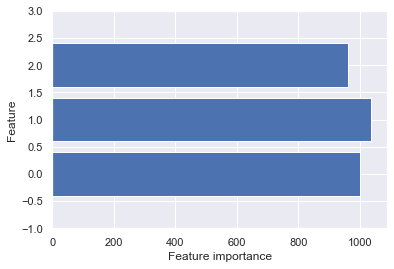

In [733]:
def plot_feature_importances(model):
    n_features = new_X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(reg)

In [734]:
pred=reg.predict(new_X_test)

In [735]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [736]:
submission

,id,trip_duration
0,id3004672,1041.172842
1,id3505355,697.914384
2,id1217141,457.725253
3,id2150126,1189.731961
4,id1598245,441.230832
...,...,...
625129,id3008929,363.080916
625130,id3700764,1426.965352
625131,id2568735,1426.965352
625132,id1384355,1362.555761


- 채점 결과: 0.54674점으로lightgbm보다 낮음

In [737]:
#submission.to_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/submission(1stacking).csv', index=False)

- 방법 2

In [712]:
from sklearn.model_selection import KFold, StratifiedKFold

def get_stacking_data2(model, X_train, y_train, X_test, n_folds=5):
    stk=StratifiedKFold(n_splits=n_folds)
    
    train_fold_predict=np.zeros((X_train.shape[0],1))
    test_predict=np.zeros((X_test.shape[0], n_folds))
    print("model: ", model.__class__.__name__)
    
    for cnt, (train_index, valid_index) in enumerate(stk.split(X_train, y_train)):
        X_train_=X_train.iloc[train_index]
        y_train_=y_train.iloc[train_index]
        X_validation=X_train.iloc[valid_index]
        
        model.fit(X_train_, y_train_)
        
        train_fold_predict[valid_index, :]=model.predict(X_validation).reshape(-1,1)
        
        test_predict[:, cnt]=model.predict(X_test)
        
    test_predict_mean=np.mean(test_predict, axis=1).reshape(-1,1)
    
    return train_fold_predict, test_predict_mean

In [713]:
xgb_train, xgb_test=get_stacking_data2(xgb_reg, X_train, y_train, X_test)
lgbm_train, lgbm_test=get_stacking_data2(lgbm_reg, X_train, y_train, X_test)
cb_train, cb_test=get_stacking_data2(cb_reg, X_train, y_train, X_test)

model:  XGBRegressor
model:  LGBMRegressor
model:  CatBoostRegressor
Learning rate set to 0.133222
0:	learn: 372.1824614	total: 81.4ms	remaining: 1m 21s
1:	learn: 351.1536296	total: 160ms	remaining: 1m 19s
2:	learn: 334.4234726	total: 236ms	remaining: 1m 18s
3:	learn: 320.8306642	total: 316ms	remaining: 1m 18s
4:	learn: 310.0177737	total: 391ms	remaining: 1m 17s
5:	learn: 301.5489328	total: 462ms	remaining: 1m 16s
6:	learn: 294.8349281	total: 539ms	remaining: 1m 16s
7:	learn: 289.5848153	total: 609ms	remaining: 1m 15s
8:	learn: 285.4554912	total: 690ms	remaining: 1m 15s
9:	learn: 282.2869793	total: 766ms	remaining: 1m 15s
10:	learn: 279.8311916	total: 840ms	remaining: 1m 15s
11:	learn: 277.8508120	total: 907ms	remaining: 1m 14s
12:	learn: 276.3166346	total: 980ms	remaining: 1m 14s
13:	learn: 275.1306659	total: 1.05s	remaining: 1m 14s
14:	learn: 274.2146375	total: 1.13s	remaining: 1m 14s
15:	learn: 273.4562651	total: 1.21s	remaining: 1m 14s
16:	learn: 272.8119766	total: 1.29s	remaining:

In [714]:
new_X_train=np.concatenate((xgb_train, lgbm_train, cb_train), axis=1)
new_X_test=np.concatenate((xgb_test, lgbm_test, cb_test), axis=1)

In [717]:
from lightgbm import LGBMClassifier  
import lightgbm as lgbm

reg = lgbm.LGBMRegressor(random_state=42) # 기본값: max_depth=3, learning_rate=0.1

reg.fit(new_X_train, y_train)
%time

Wall time: 0 ns


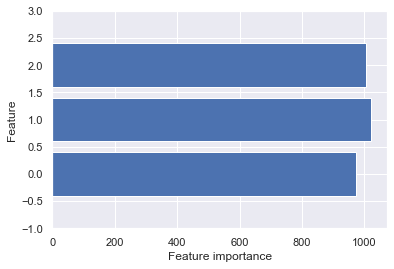

In [723]:
def plot_feature_importances(model):
    n_features = new_X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
     
plot_feature_importances(reg)

In [724]:
pred=reg.predict(new_X_test)

In [725]:
submission = df_test['id']
submission = {"id":df_test["id"],"trip_duration":pred}
submission = pd.DataFrame(submission)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             625134 non-null  object 
 1   trip_duration  625134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.5+ MB


In [726]:
submission

,id,trip_duration
0,id3004672,1040.138785
1,id3505355,733.678254
2,id1217141,460.964308
3,id2150126,1192.147342
4,id1598245,444.346491
...,...,...
625129,id3008929,377.498064
625130,id3700764,1408.000447
625131,id2568735,1420.086332
625132,id1384355,1389.053170


- 채점 점수: 0.56010으로 lightgbm보다 낮음

In [727]:
#submission.to_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/submission(stacking).csv', index=False)

결론: Lightgbm model의 결과가 가장 좋습니다. - 끝 -
--